## PyTorch DataLoader

### CustomData Loader for Custom Datasets

- ForwardPass can be done byfitting the model to ALL of the data
- Not Practical for very large datasets

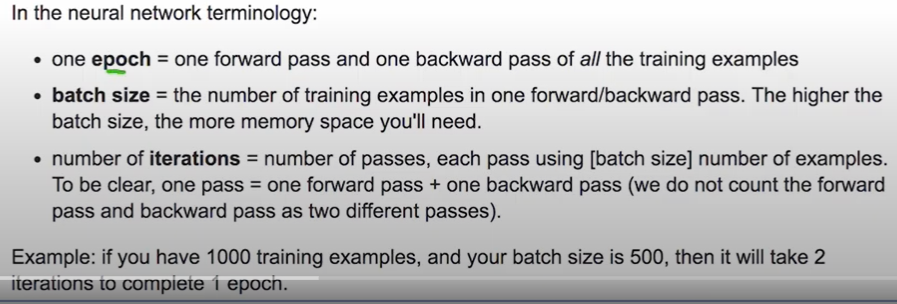

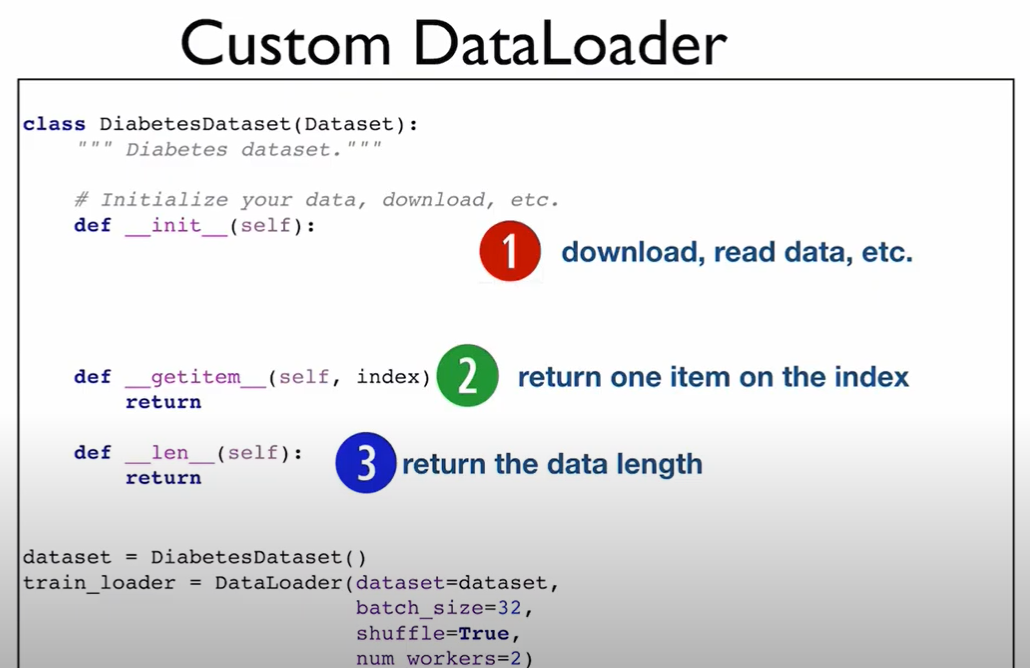

In [430]:
from torch.utils.data import Dataset, DataLoader
from torch import from_numpy, tensor
import numpy as np

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Setting up DataLoader</b> 

</p>

In [447]:
class DiabetesDataset(Dataset):
    """ Diabetes dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        xy = np.loadtxt('Dataset/diabetes.csv',
                        delimiter=',', dtype=np.float32)  #LOAD DATA
        self.len = xy.shape[0]                  #Number of Observations
        self.x_data = from_numpy(xy[:, 0:-1])  #CONVERT TO TENSOR
        self.y_data = from_numpy(xy[:, [-1]])   #CONVERT TO TENSOR

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len        #Number of Observations

In [448]:
dataset = DiabetesDataset()

In [453]:
train_loader = DataLoader(dataset=dataset,
                          batch_size=32,
                          shuffle=True,
                          num_workers=0)

In [456]:
for epoch in range(2):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data      #BATCH DATA!!!!!!!!!! (data size = 32 (BATCH_SIZE))

        # wrap them in Variable
        inputs, labels = tensor(inputs), tensor(labels)

        # Run your training process
        print(f'Epoch: {i} | Inputs {inputs.data} | Labels {labels.data}')

C:\Users\Ashwin\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


Epoch: 0 | Inputs tensor([[-0.6471, -0.2161,  0.1475,  0.0000,  0.0000, -0.0313, -0.8360, -0.4000],
        [-0.7647, -0.0553,  0.2459, -0.6364, -0.8440, -0.0581, -0.5124, -0.9333],
        [-0.8824, -0.2864,  0.2787,  0.0101, -0.8936, -0.0104, -0.7062,  0.0000],
        [ 0.2941,  0.3869,  0.2131, -0.4747, -0.6596,  0.0760, -0.5909, -0.0333],
        [-0.8824, -0.0653,  0.1475, -0.3737,  0.0000, -0.0939, -0.7976, -0.9333],
        [-0.8824, -0.0050, -0.0492, -0.7980,  0.0000, -0.2429, -0.5961,  0.0000],
        [ 0.0000,  0.7789, -0.0164, -0.4141,  0.1300,  0.0313, -0.1512,  0.0000],
        [-0.8824, -0.0854, -0.1148, -0.4949, -0.7636, -0.2489, -0.8668, -0.9333],
        [ 0.0000,  0.1960,  0.0492, -0.6364, -0.7825,  0.0402, -0.4475, -0.9333],
        [-0.8824, -0.1357,  0.0820,  0.0505, -0.8463,  0.2310, -0.2835, -0.7333],
        [-0.2941,  0.1960, -0.1803, -0.5556, -0.5839, -0.1922,  0.0589, -0.6000],
        [-0.5294,  0.2563,  0.3115,  0.0000,  0.0000, -0.0373, -0.6089, -0.8000]

        [0.]])
Epoch: 16 | Inputs tensor([[ 0.0000,  0.8191,  0.4426, -0.1111,  0.2057,  0.2906, -0.8770, -0.8333],
        [-0.7647,  0.0151, -0.0492, -0.2929, -0.7872, -0.3502, -0.9342, -0.9667],
        [ 0.1765,  0.1156,  0.1475, -0.4545,  0.0000, -0.1803, -0.9462, -0.3667],
        [-0.8824, -0.1156,  0.0164, -0.5152, -0.8960, -0.1088, -0.7062, -0.9333],
        [-0.6471,  0.9196,  0.1148, -0.6970, -0.6927, -0.0790, -0.8113, -0.5667],
        [-0.8824,  0.0854,  0.4426, -0.6162,  0.0000, -0.1922, -0.7250, -0.9000],
        [-0.1765,  0.7990,  0.5574, -0.3737,  0.0000,  0.0194, -0.9266,  0.3000],
        [-0.8824,  0.1759,  0.4426, -0.5152, -0.6572,  0.0283, -0.7225, -0.3667],
        [-0.6471,  0.0653,  0.1803,  0.0000,  0.0000, -0.2310, -0.8898, -0.8000],
        [ 0.5294,  0.2663,  0.4754,  0.0000,  0.0000,  0.2936, -0.5687, -0.3000],
        [-0.2941,  0.0553,  0.3115, -0.4343,  0.0000, -0.0313, -0.3168, -0.8333],
        [-0.6471, -0.2161,  0.1475,  0.0000,  0.0000, -0.0313, -

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Logisitc Regression</b> 

</p>

In [443]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(8, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

In [444]:
model = Model()

In [445]:
criterion = nn.BCELoss(reduction='sum')
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [460]:
# Training loop
for epoch in range(1000):
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(inputs)

        # Compute and print loss
        loss = criterion(y_pred, labels)
        print(f'Epoch {epoch + 1} | Batch: {i+1} | Loss: {loss.item():.4f}')

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Epoch 1 | Batch: 1 | Loss: 19.2041
Epoch 1 | Batch: 2 | Loss: 16.2096
Epoch 1 | Batch: 3 | Loss: 12.9365
Epoch 1 | Batch: 4 | Loss: 10.0908
Epoch 1 | Batch: 5 | Loss: 17.0546
Epoch 1 | Batch: 6 | Loss: 17.1344
Epoch 1 | Batch: 7 | Loss: 12.0433
Epoch 1 | Batch: 8 | Loss: 19.5790
Epoch 1 | Batch: 9 | Loss: 12.0455
Epoch 1 | Batch: 10 | Loss: 16.4987
Epoch 1 | Batch: 11 | Loss: 14.7681
Epoch 1 | Batch: 12 | Loss: 15.5323
Epoch 1 | Batch: 13 | Loss: 14.4125
Epoch 1 | Batch: 14 | Loss: 11.5744
Epoch 1 | Batch: 15 | Loss: 19.7510
Epoch 1 | Batch: 16 | Loss: 13.5193
Epoch 1 | Batch: 17 | Loss: 11.5482
Epoch 1 | Batch: 18 | Loss: 10.9043
Epoch 1 | Batch: 19 | Loss: 16.2977
Epoch 1 | Batch: 20 | Loss: 17.2297
Epoch 1 | Batch: 21 | Loss: 9.8970
Epoch 1 | Batch: 22 | Loss: 17.3132
Epoch 1 | Batch: 23 | Loss: 15.6629
Epoch 1 | Batch: 24 | Loss: 9.1850
Epoch 2 | Batch: 1 | Loss: 15.0847
Epoch 2 | Batch: 2 | Loss: 14.1470
Epoch 2 | Batch: 3 | Loss: 13.4783
Epoch 2 | Batch: 4 | Loss: 8.5291
Epoch 2 

Epoch 11 | Batch: 15 | Loss: 9.4904
Epoch 11 | Batch: 16 | Loss: 15.5920
Epoch 11 | Batch: 17 | Loss: 15.9285
Epoch 11 | Batch: 18 | Loss: 11.4245
Epoch 11 | Batch: 19 | Loss: 17.5717
Epoch 11 | Batch: 20 | Loss: 20.5594
Epoch 11 | Batch: 21 | Loss: 11.5990
Epoch 11 | Batch: 22 | Loss: 12.9036
Epoch 11 | Batch: 23 | Loss: 15.9890
Epoch 11 | Batch: 24 | Loss: 8.9843
Epoch 12 | Batch: 1 | Loss: 16.3491
Epoch 12 | Batch: 2 | Loss: 17.7422
Epoch 12 | Batch: 3 | Loss: 15.9072
Epoch 12 | Batch: 4 | Loss: 17.3888
Epoch 12 | Batch: 5 | Loss: 13.8503
Epoch 12 | Batch: 6 | Loss: 15.1208
Epoch 12 | Batch: 7 | Loss: 16.0259
Epoch 12 | Batch: 8 | Loss: 16.1851
Epoch 12 | Batch: 9 | Loss: 12.2467
Epoch 12 | Batch: 10 | Loss: 12.8833
Epoch 12 | Batch: 11 | Loss: 14.8719
Epoch 12 | Batch: 12 | Loss: 15.4411
Epoch 12 | Batch: 13 | Loss: 21.1197
Epoch 12 | Batch: 14 | Loss: 14.0598
Epoch 12 | Batch: 15 | Loss: 16.3989
Epoch 12 | Batch: 16 | Loss: 15.8392
Epoch 12 | Batch: 17 | Loss: 15.0237
Epoch 12 | B

Epoch 22 | Batch: 15 | Loss: 13.0415
Epoch 22 | Batch: 16 | Loss: 21.3456
Epoch 22 | Batch: 17 | Loss: 10.6555
Epoch 22 | Batch: 18 | Loss: 14.5549
Epoch 22 | Batch: 19 | Loss: 15.8305
Epoch 22 | Batch: 20 | Loss: 16.9456
Epoch 22 | Batch: 21 | Loss: 11.4737
Epoch 22 | Batch: 22 | Loss: 15.0950
Epoch 22 | Batch: 23 | Loss: 13.0379
Epoch 22 | Batch: 24 | Loss: 7.5550
Epoch 23 | Batch: 1 | Loss: 17.0485
Epoch 23 | Batch: 2 | Loss: 13.6115
Epoch 23 | Batch: 3 | Loss: 12.2860
Epoch 23 | Batch: 4 | Loss: 13.6075
Epoch 23 | Batch: 5 | Loss: 16.8649
Epoch 23 | Batch: 6 | Loss: 10.9828
Epoch 23 | Batch: 7 | Loss: 15.6316
Epoch 23 | Batch: 8 | Loss: 9.1412
Epoch 23 | Batch: 9 | Loss: 10.3878
Epoch 23 | Batch: 10 | Loss: 20.1378
Epoch 23 | Batch: 11 | Loss: 11.2098
Epoch 23 | Batch: 12 | Loss: 15.7901
Epoch 23 | Batch: 13 | Loss: 18.2110
Epoch 23 | Batch: 14 | Loss: 13.5395
Epoch 23 | Batch: 15 | Loss: 20.7704
Epoch 23 | Batch: 16 | Loss: 16.5073
Epoch 23 | Batch: 17 | Loss: 11.1666
Epoch 23 | B

Epoch 33 | Batch: 10 | Loss: 16.0889
Epoch 33 | Batch: 11 | Loss: 22.4317
Epoch 33 | Batch: 12 | Loss: 13.9812
Epoch 33 | Batch: 13 | Loss: 16.1388
Epoch 33 | Batch: 14 | Loss: 12.2165
Epoch 33 | Batch: 15 | Loss: 16.5555
Epoch 33 | Batch: 16 | Loss: 20.4109
Epoch 33 | Batch: 17 | Loss: 12.3829
Epoch 33 | Batch: 18 | Loss: 13.9664
Epoch 33 | Batch: 19 | Loss: 8.0507
Epoch 33 | Batch: 20 | Loss: 13.9524
Epoch 33 | Batch: 21 | Loss: 9.9821
Epoch 33 | Batch: 22 | Loss: 14.4575
Epoch 33 | Batch: 23 | Loss: 14.3571
Epoch 33 | Batch: 24 | Loss: 8.4535
Epoch 34 | Batch: 1 | Loss: 18.1004
Epoch 34 | Batch: 2 | Loss: 17.9153
Epoch 34 | Batch: 3 | Loss: 13.2570
Epoch 34 | Batch: 4 | Loss: 12.9818
Epoch 34 | Batch: 5 | Loss: 18.3643
Epoch 34 | Batch: 6 | Loss: 19.2770
Epoch 34 | Batch: 7 | Loss: 16.7001
Epoch 34 | Batch: 8 | Loss: 16.5488
Epoch 34 | Batch: 9 | Loss: 14.7489
Epoch 34 | Batch: 10 | Loss: 11.6040
Epoch 34 | Batch: 11 | Loss: 10.6503
Epoch 34 | Batch: 12 | Loss: 15.5896
Epoch 34 | Ba

Epoch 46 | Batch: 5 | Loss: 12.2751
Epoch 46 | Batch: 6 | Loss: 10.7678
Epoch 46 | Batch: 7 | Loss: 21.1187
Epoch 46 | Batch: 8 | Loss: 14.0377
Epoch 46 | Batch: 9 | Loss: 14.8252
Epoch 46 | Batch: 10 | Loss: 15.6689
Epoch 46 | Batch: 11 | Loss: 17.0296
Epoch 46 | Batch: 12 | Loss: 13.8111
Epoch 46 | Batch: 13 | Loss: 12.8557
Epoch 46 | Batch: 14 | Loss: 20.1805
Epoch 46 | Batch: 15 | Loss: 10.4656
Epoch 46 | Batch: 16 | Loss: 15.3119
Epoch 46 | Batch: 17 | Loss: 12.0176
Epoch 46 | Batch: 18 | Loss: 18.3388
Epoch 46 | Batch: 19 | Loss: 11.8023
Epoch 46 | Batch: 20 | Loss: 13.2403
Epoch 46 | Batch: 21 | Loss: 18.4548
Epoch 46 | Batch: 22 | Loss: 11.5179
Epoch 46 | Batch: 23 | Loss: 14.0449
Epoch 46 | Batch: 24 | Loss: 9.0764
Epoch 47 | Batch: 1 | Loss: 16.3524
Epoch 47 | Batch: 2 | Loss: 14.0941
Epoch 47 | Batch: 3 | Loss: 14.9175
Epoch 47 | Batch: 4 | Loss: 13.7617
Epoch 47 | Batch: 5 | Loss: 12.0319
Epoch 47 | Batch: 6 | Loss: 9.7398
Epoch 47 | Batch: 7 | Loss: 11.3237
Epoch 47 | Batc

Epoch 57 | Batch: 13 | Loss: 14.2461
Epoch 57 | Batch: 14 | Loss: 15.9333
Epoch 57 | Batch: 15 | Loss: 12.6754
Epoch 57 | Batch: 16 | Loss: 12.1489
Epoch 57 | Batch: 17 | Loss: 13.8632
Epoch 57 | Batch: 18 | Loss: 11.2818
Epoch 57 | Batch: 19 | Loss: 10.6632
Epoch 57 | Batch: 20 | Loss: 17.0891
Epoch 57 | Batch: 21 | Loss: 11.3550
Epoch 57 | Batch: 22 | Loss: 16.6305
Epoch 57 | Batch: 23 | Loss: 23.0501
Epoch 57 | Batch: 24 | Loss: 8.7074
Epoch 58 | Batch: 1 | Loss: 13.7040
Epoch 58 | Batch: 2 | Loss: 15.5954
Epoch 58 | Batch: 3 | Loss: 11.0002
Epoch 58 | Batch: 4 | Loss: 14.8170
Epoch 58 | Batch: 5 | Loss: 16.9097
Epoch 58 | Batch: 6 | Loss: 13.9170
Epoch 58 | Batch: 7 | Loss: 11.7747
Epoch 58 | Batch: 8 | Loss: 15.5715
Epoch 58 | Batch: 9 | Loss: 15.2896
Epoch 58 | Batch: 10 | Loss: 13.4475
Epoch 58 | Batch: 11 | Loss: 14.9260
Epoch 58 | Batch: 12 | Loss: 11.4848
Epoch 58 | Batch: 13 | Loss: 15.5079
Epoch 58 | Batch: 14 | Loss: 14.7452
Epoch 58 | Batch: 15 | Loss: 14.4447
Epoch 58 | 

Epoch 69 | Batch: 2 | Loss: 18.5079
Epoch 69 | Batch: 3 | Loss: 14.8740
Epoch 69 | Batch: 4 | Loss: 16.0124
Epoch 69 | Batch: 5 | Loss: 18.0417
Epoch 69 | Batch: 6 | Loss: 16.0039
Epoch 69 | Batch: 7 | Loss: 16.7053
Epoch 69 | Batch: 8 | Loss: 10.6724
Epoch 69 | Batch: 9 | Loss: 16.7207
Epoch 69 | Batch: 10 | Loss: 9.6604
Epoch 69 | Batch: 11 | Loss: 10.6371
Epoch 69 | Batch: 12 | Loss: 11.1560
Epoch 69 | Batch: 13 | Loss: 10.2931
Epoch 69 | Batch: 14 | Loss: 10.5146
Epoch 69 | Batch: 15 | Loss: 12.8714
Epoch 69 | Batch: 16 | Loss: 17.4512
Epoch 69 | Batch: 17 | Loss: 11.9894
Epoch 69 | Batch: 18 | Loss: 19.0989
Epoch 69 | Batch: 19 | Loss: 13.1974
Epoch 69 | Batch: 20 | Loss: 10.4406
Epoch 69 | Batch: 21 | Loss: 11.1730
Epoch 69 | Batch: 22 | Loss: 21.6469
Epoch 69 | Batch: 23 | Loss: 17.7407
Epoch 69 | Batch: 24 | Loss: 9.2467
Epoch 70 | Batch: 1 | Loss: 14.3890
Epoch 70 | Batch: 2 | Loss: 16.1153
Epoch 70 | Batch: 3 | Loss: 9.7960
Epoch 70 | Batch: 4 | Loss: 17.7304
Epoch 70 | Batch

Epoch 79 | Batch: 18 | Loss: 12.8706
Epoch 79 | Batch: 19 | Loss: 14.3254
Epoch 79 | Batch: 20 | Loss: 17.8175
Epoch 79 | Batch: 21 | Loss: 12.6094
Epoch 79 | Batch: 22 | Loss: 12.1675
Epoch 79 | Batch: 23 | Loss: 17.5560
Epoch 79 | Batch: 24 | Loss: 9.3155
Epoch 80 | Batch: 1 | Loss: 13.0564
Epoch 80 | Batch: 2 | Loss: 18.7028
Epoch 80 | Batch: 3 | Loss: 12.7224
Epoch 80 | Batch: 4 | Loss: 11.4893
Epoch 80 | Batch: 5 | Loss: 19.2834
Epoch 80 | Batch: 6 | Loss: 11.3869
Epoch 80 | Batch: 7 | Loss: 16.1932
Epoch 80 | Batch: 8 | Loss: 14.0609
Epoch 80 | Batch: 9 | Loss: 13.0594
Epoch 80 | Batch: 10 | Loss: 13.0182
Epoch 80 | Batch: 11 | Loss: 12.2236
Epoch 80 | Batch: 12 | Loss: 13.1805
Epoch 80 | Batch: 13 | Loss: 13.2087
Epoch 80 | Batch: 14 | Loss: 15.0086
Epoch 80 | Batch: 15 | Loss: 16.4507
Epoch 80 | Batch: 16 | Loss: 16.7500
Epoch 80 | Batch: 17 | Loss: 16.0633
Epoch 80 | Batch: 18 | Loss: 13.1075
Epoch 80 | Batch: 19 | Loss: 17.7387
Epoch 80 | Batch: 20 | Loss: 14.9388
Epoch 80 | 

Epoch 90 | Batch: 22 | Loss: 18.4366
Epoch 90 | Batch: 23 | Loss: 9.9910
Epoch 90 | Batch: 24 | Loss: 8.8267
Epoch 91 | Batch: 1 | Loss: 11.5978
Epoch 91 | Batch: 2 | Loss: 10.5081
Epoch 91 | Batch: 3 | Loss: 10.4839
Epoch 91 | Batch: 4 | Loss: 14.2944
Epoch 91 | Batch: 5 | Loss: 16.9995
Epoch 91 | Batch: 6 | Loss: 13.8644
Epoch 91 | Batch: 7 | Loss: 10.7469
Epoch 91 | Batch: 8 | Loss: 9.2623
Epoch 91 | Batch: 9 | Loss: 13.6346
Epoch 91 | Batch: 10 | Loss: 16.0810
Epoch 91 | Batch: 11 | Loss: 7.9590
Epoch 91 | Batch: 12 | Loss: 19.2166
Epoch 91 | Batch: 13 | Loss: 18.9613
Epoch 91 | Batch: 14 | Loss: 14.1863
Epoch 91 | Batch: 15 | Loss: 15.1578
Epoch 91 | Batch: 16 | Loss: 14.5948
Epoch 91 | Batch: 17 | Loss: 16.5624
Epoch 91 | Batch: 18 | Loss: 20.5533
Epoch 91 | Batch: 19 | Loss: 14.7886
Epoch 91 | Batch: 20 | Loss: 14.0716
Epoch 91 | Batch: 21 | Loss: 17.5446
Epoch 91 | Batch: 22 | Loss: 13.4967
Epoch 91 | Batch: 23 | Loss: 13.1817
Epoch 91 | Batch: 24 | Loss: 7.8423
Epoch 92 | Batc

Epoch 102 | Batch: 10 | Loss: 11.1157
Epoch 102 | Batch: 11 | Loss: 18.3266
Epoch 102 | Batch: 12 | Loss: 16.7395
Epoch 102 | Batch: 13 | Loss: 21.6270
Epoch 102 | Batch: 14 | Loss: 13.9273
Epoch 102 | Batch: 15 | Loss: 11.1152
Epoch 102 | Batch: 16 | Loss: 14.1963
Epoch 102 | Batch: 17 | Loss: 13.3156
Epoch 102 | Batch: 18 | Loss: 12.2284
Epoch 102 | Batch: 19 | Loss: 10.1337
Epoch 102 | Batch: 20 | Loss: 13.3683
Epoch 102 | Batch: 21 | Loss: 15.1458
Epoch 102 | Batch: 22 | Loss: 12.5921
Epoch 102 | Batch: 23 | Loss: 13.1120
Epoch 102 | Batch: 24 | Loss: 17.2448
Epoch 103 | Batch: 1 | Loss: 9.9985
Epoch 103 | Batch: 2 | Loss: 9.6409
Epoch 103 | Batch: 3 | Loss: 21.1814
Epoch 103 | Batch: 4 | Loss: 11.4378
Epoch 103 | Batch: 5 | Loss: 16.7302
Epoch 103 | Batch: 6 | Loss: 12.6753
Epoch 103 | Batch: 7 | Loss: 12.6628
Epoch 103 | Batch: 8 | Loss: 14.7902
Epoch 103 | Batch: 9 | Loss: 13.1829
Epoch 103 | Batch: 10 | Loss: 14.1879
Epoch 103 | Batch: 11 | Loss: 15.6437
Epoch 103 | Batch: 12 |

Epoch 113 | Batch: 19 | Loss: 11.3901
Epoch 113 | Batch: 20 | Loss: 10.0466
Epoch 113 | Batch: 21 | Loss: 15.0180
Epoch 113 | Batch: 22 | Loss: 12.8248
Epoch 113 | Batch: 23 | Loss: 13.0892
Epoch 113 | Batch: 24 | Loss: 11.7869
Epoch 114 | Batch: 1 | Loss: 12.5697
Epoch 114 | Batch: 2 | Loss: 20.1058
Epoch 114 | Batch: 3 | Loss: 17.6964
Epoch 114 | Batch: 4 | Loss: 12.5622
Epoch 114 | Batch: 5 | Loss: 11.6156
Epoch 114 | Batch: 6 | Loss: 18.2826
Epoch 114 | Batch: 7 | Loss: 11.2134
Epoch 114 | Batch: 8 | Loss: 13.2815
Epoch 114 | Batch: 9 | Loss: 10.1826
Epoch 114 | Batch: 10 | Loss: 11.6862
Epoch 114 | Batch: 11 | Loss: 16.9346
Epoch 114 | Batch: 12 | Loss: 17.1959
Epoch 114 | Batch: 13 | Loss: 16.2862
Epoch 114 | Batch: 14 | Loss: 13.4622
Epoch 114 | Batch: 15 | Loss: 15.4122
Epoch 114 | Batch: 16 | Loss: 13.2536
Epoch 114 | Batch: 17 | Loss: 9.1648
Epoch 114 | Batch: 18 | Loss: 13.3927
Epoch 114 | Batch: 19 | Loss: 15.0568
Epoch 114 | Batch: 20 | Loss: 14.8451
Epoch 114 | Batch: 21 

Epoch 125 | Batch: 14 | Loss: 9.2400
Epoch 125 | Batch: 15 | Loss: 14.5231
Epoch 125 | Batch: 16 | Loss: 7.9272
Epoch 125 | Batch: 17 | Loss: 18.1762
Epoch 125 | Batch: 18 | Loss: 12.9111
Epoch 125 | Batch: 19 | Loss: 14.2765
Epoch 125 | Batch: 20 | Loss: 15.0824
Epoch 125 | Batch: 21 | Loss: 12.7965
Epoch 125 | Batch: 22 | Loss: 12.4262
Epoch 125 | Batch: 23 | Loss: 15.9234
Epoch 125 | Batch: 24 | Loss: 9.0043
Epoch 126 | Batch: 1 | Loss: 11.8657
Epoch 126 | Batch: 2 | Loss: 7.3837
Epoch 126 | Batch: 3 | Loss: 16.6347
Epoch 126 | Batch: 4 | Loss: 13.8827
Epoch 126 | Batch: 5 | Loss: 14.0452
Epoch 126 | Batch: 6 | Loss: 20.6784
Epoch 126 | Batch: 7 | Loss: 14.5847
Epoch 126 | Batch: 8 | Loss: 10.3342
Epoch 126 | Batch: 9 | Loss: 12.7353
Epoch 126 | Batch: 10 | Loss: 16.0445
Epoch 126 | Batch: 11 | Loss: 9.7585
Epoch 126 | Batch: 12 | Loss: 14.5348
Epoch 126 | Batch: 13 | Loss: 13.6051
Epoch 126 | Batch: 14 | Loss: 13.8641
Epoch 126 | Batch: 15 | Loss: 25.1905
Epoch 126 | Batch: 16 | Lo

Epoch 136 | Batch: 21 | Loss: 11.5129
Epoch 136 | Batch: 22 | Loss: 11.6943
Epoch 136 | Batch: 23 | Loss: 11.7153
Epoch 136 | Batch: 24 | Loss: 9.1100
Epoch 137 | Batch: 1 | Loss: 14.7896
Epoch 137 | Batch: 2 | Loss: 10.1630
Epoch 137 | Batch: 3 | Loss: 16.9834
Epoch 137 | Batch: 4 | Loss: 9.4665
Epoch 137 | Batch: 5 | Loss: 12.6040
Epoch 137 | Batch: 6 | Loss: 12.8639
Epoch 137 | Batch: 7 | Loss: 15.0609
Epoch 137 | Batch: 8 | Loss: 11.6957
Epoch 137 | Batch: 9 | Loss: 15.1694
Epoch 137 | Batch: 10 | Loss: 17.7292
Epoch 137 | Batch: 11 | Loss: 9.5720
Epoch 137 | Batch: 12 | Loss: 16.0622
Epoch 137 | Batch: 13 | Loss: 11.7167
Epoch 137 | Batch: 14 | Loss: 12.4470
Epoch 137 | Batch: 15 | Loss: 13.5316
Epoch 137 | Batch: 16 | Loss: 15.3900
Epoch 137 | Batch: 17 | Loss: 19.7181
Epoch 137 | Batch: 18 | Loss: 12.3120
Epoch 137 | Batch: 19 | Loss: 15.9174
Epoch 137 | Batch: 20 | Loss: 15.6930
Epoch 137 | Batch: 21 | Loss: 10.3096
Epoch 137 | Batch: 22 | Loss: 10.8995
Epoch 137 | Batch: 23 | 

Epoch 146 | Batch: 10 | Loss: 15.6500
Epoch 146 | Batch: 11 | Loss: 15.2495
Epoch 146 | Batch: 12 | Loss: 14.4103
Epoch 146 | Batch: 13 | Loss: 14.8619
Epoch 146 | Batch: 14 | Loss: 11.5433
Epoch 146 | Batch: 15 | Loss: 13.9843
Epoch 146 | Batch: 16 | Loss: 12.4957
Epoch 146 | Batch: 17 | Loss: 11.9120
Epoch 146 | Batch: 18 | Loss: 14.1685
Epoch 146 | Batch: 19 | Loss: 14.2064
Epoch 146 | Batch: 20 | Loss: 11.5727
Epoch 146 | Batch: 21 | Loss: 15.3279
Epoch 146 | Batch: 22 | Loss: 15.3391
Epoch 146 | Batch: 23 | Loss: 10.9447
Epoch 146 | Batch: 24 | Loss: 10.2936
Epoch 147 | Batch: 1 | Loss: 10.0690
Epoch 147 | Batch: 2 | Loss: 17.6540
Epoch 147 | Batch: 3 | Loss: 12.3842
Epoch 147 | Batch: 4 | Loss: 14.9649
Epoch 147 | Batch: 5 | Loss: 10.6249
Epoch 147 | Batch: 6 | Loss: 15.2786
Epoch 147 | Batch: 7 | Loss: 9.3298
Epoch 147 | Batch: 8 | Loss: 13.7139
Epoch 147 | Batch: 9 | Loss: 16.6093
Epoch 147 | Batch: 10 | Loss: 6.8995
Epoch 147 | Batch: 11 | Loss: 15.0248
Epoch 147 | Batch: 12 |

Epoch 156 | Batch: 15 | Loss: 10.5407
Epoch 156 | Batch: 16 | Loss: 13.8018
Epoch 156 | Batch: 17 | Loss: 12.2863
Epoch 156 | Batch: 18 | Loss: 15.6438
Epoch 156 | Batch: 19 | Loss: 12.4915
Epoch 156 | Batch: 20 | Loss: 12.6714
Epoch 156 | Batch: 21 | Loss: 13.9108
Epoch 156 | Batch: 22 | Loss: 14.7561
Epoch 156 | Batch: 23 | Loss: 12.6643
Epoch 156 | Batch: 24 | Loss: 13.0969
Epoch 157 | Batch: 1 | Loss: 21.3676
Epoch 157 | Batch: 2 | Loss: 10.9369
Epoch 157 | Batch: 3 | Loss: 8.8371
Epoch 157 | Batch: 4 | Loss: 14.2790
Epoch 157 | Batch: 5 | Loss: 17.0954
Epoch 157 | Batch: 6 | Loss: 11.9275
Epoch 157 | Batch: 7 | Loss: 12.5495
Epoch 157 | Batch: 8 | Loss: 13.3330
Epoch 157 | Batch: 9 | Loss: 16.7474
Epoch 157 | Batch: 10 | Loss: 12.5566
Epoch 157 | Batch: 11 | Loss: 9.3616
Epoch 157 | Batch: 12 | Loss: 12.6888
Epoch 157 | Batch: 13 | Loss: 12.7134
Epoch 157 | Batch: 14 | Loss: 12.4812
Epoch 157 | Batch: 15 | Loss: 17.0276
Epoch 157 | Batch: 16 | Loss: 21.3444
Epoch 157 | Batch: 17 |

Epoch 167 | Batch: 21 | Loss: 18.0317
Epoch 167 | Batch: 22 | Loss: 11.6561
Epoch 167 | Batch: 23 | Loss: 8.6156
Epoch 167 | Batch: 24 | Loss: 8.8828
Epoch 168 | Batch: 1 | Loss: 18.9858
Epoch 168 | Batch: 2 | Loss: 17.4124
Epoch 168 | Batch: 3 | Loss: 8.0310
Epoch 168 | Batch: 4 | Loss: 11.3352
Epoch 168 | Batch: 5 | Loss: 13.5750
Epoch 168 | Batch: 6 | Loss: 15.8843
Epoch 168 | Batch: 7 | Loss: 13.5083
Epoch 168 | Batch: 8 | Loss: 10.1334
Epoch 168 | Batch: 9 | Loss: 9.8767
Epoch 168 | Batch: 10 | Loss: 14.5916
Epoch 168 | Batch: 11 | Loss: 10.5887
Epoch 168 | Batch: 12 | Loss: 13.6000
Epoch 168 | Batch: 13 | Loss: 22.1481
Epoch 168 | Batch: 14 | Loss: 14.6854
Epoch 168 | Batch: 15 | Loss: 11.3981
Epoch 168 | Batch: 16 | Loss: 13.2027
Epoch 168 | Batch: 17 | Loss: 10.9770
Epoch 168 | Batch: 18 | Loss: 8.8485
Epoch 168 | Batch: 19 | Loss: 15.0075
Epoch 168 | Batch: 20 | Loss: 17.2338
Epoch 168 | Batch: 21 | Loss: 15.0626
Epoch 168 | Batch: 22 | Loss: 13.5732
Epoch 168 | Batch: 23 | Lo

Epoch 179 | Batch: 11 | Loss: 14.9680
Epoch 179 | Batch: 12 | Loss: 15.7468
Epoch 179 | Batch: 13 | Loss: 12.7987
Epoch 179 | Batch: 14 | Loss: 15.6345
Epoch 179 | Batch: 15 | Loss: 17.3137
Epoch 179 | Batch: 16 | Loss: 13.3729
Epoch 179 | Batch: 17 | Loss: 14.5623
Epoch 179 | Batch: 18 | Loss: 13.8434
Epoch 179 | Batch: 19 | Loss: 12.3352
Epoch 179 | Batch: 20 | Loss: 15.7810
Epoch 179 | Batch: 21 | Loss: 14.2167
Epoch 179 | Batch: 22 | Loss: 24.1871
Epoch 179 | Batch: 23 | Loss: 14.7599
Epoch 179 | Batch: 24 | Loss: 6.6988
Epoch 180 | Batch: 1 | Loss: 17.4013
Epoch 180 | Batch: 2 | Loss: 15.8097
Epoch 180 | Batch: 3 | Loss: 10.6062
Epoch 180 | Batch: 4 | Loss: 12.8699
Epoch 180 | Batch: 5 | Loss: 11.6279
Epoch 180 | Batch: 6 | Loss: 15.8747
Epoch 180 | Batch: 7 | Loss: 11.3155
Epoch 180 | Batch: 8 | Loss: 11.0092
Epoch 180 | Batch: 9 | Loss: 16.8489
Epoch 180 | Batch: 10 | Loss: 16.1893
Epoch 180 | Batch: 11 | Loss: 13.0762
Epoch 180 | Batch: 12 | Loss: 12.0394
Epoch 180 | Batch: 13 

Epoch 190 | Batch: 20 | Loss: 19.5207
Epoch 190 | Batch: 21 | Loss: 10.5303
Epoch 190 | Batch: 22 | Loss: 13.5503
Epoch 190 | Batch: 23 | Loss: 13.0761
Epoch 190 | Batch: 24 | Loss: 9.2249
Epoch 191 | Batch: 1 | Loss: 12.8151
Epoch 191 | Batch: 2 | Loss: 10.4861
Epoch 191 | Batch: 3 | Loss: 24.4652
Epoch 191 | Batch: 4 | Loss: 11.9274
Epoch 191 | Batch: 5 | Loss: 13.9451
Epoch 191 | Batch: 6 | Loss: 15.8639
Epoch 191 | Batch: 7 | Loss: 15.9659
Epoch 191 | Batch: 8 | Loss: 13.4509
Epoch 191 | Batch: 9 | Loss: 13.6442
Epoch 191 | Batch: 10 | Loss: 8.7575
Epoch 191 | Batch: 11 | Loss: 10.8857
Epoch 191 | Batch: 12 | Loss: 12.7920
Epoch 191 | Batch: 13 | Loss: 13.1114
Epoch 191 | Batch: 14 | Loss: 13.2480
Epoch 191 | Batch: 15 | Loss: 9.5317
Epoch 191 | Batch: 16 | Loss: 12.8180
Epoch 191 | Batch: 17 | Loss: 14.4741
Epoch 191 | Batch: 18 | Loss: 14.9314
Epoch 191 | Batch: 19 | Loss: 16.7669
Epoch 191 | Batch: 20 | Loss: 11.8284
Epoch 191 | Batch: 21 | Loss: 11.2369
Epoch 191 | Batch: 22 | 

Epoch 201 | Batch: 24 | Loss: 12.5009
Epoch 202 | Batch: 1 | Loss: 12.2028
Epoch 202 | Batch: 2 | Loss: 12.5171
Epoch 202 | Batch: 3 | Loss: 11.7435
Epoch 202 | Batch: 4 | Loss: 16.3225
Epoch 202 | Batch: 5 | Loss: 14.8932
Epoch 202 | Batch: 6 | Loss: 11.6810
Epoch 202 | Batch: 7 | Loss: 17.5884
Epoch 202 | Batch: 8 | Loss: 15.3360
Epoch 202 | Batch: 9 | Loss: 11.9978
Epoch 202 | Batch: 10 | Loss: 10.6886
Epoch 202 | Batch: 11 | Loss: 13.0635
Epoch 202 | Batch: 12 | Loss: 13.5990
Epoch 202 | Batch: 13 | Loss: 16.8638
Epoch 202 | Batch: 14 | Loss: 14.5873
Epoch 202 | Batch: 15 | Loss: 12.4810
Epoch 202 | Batch: 16 | Loss: 13.6328
Epoch 202 | Batch: 17 | Loss: 10.1337
Epoch 202 | Batch: 18 | Loss: 18.9671
Epoch 202 | Batch: 19 | Loss: 17.3849
Epoch 202 | Batch: 20 | Loss: 16.1494
Epoch 202 | Batch: 21 | Loss: 9.8703
Epoch 202 | Batch: 22 | Loss: 11.7686
Epoch 202 | Batch: 23 | Loss: 12.1241
Epoch 202 | Batch: 24 | Loss: 8.2615
Epoch 203 | Batch: 1 | Loss: 11.3738
Epoch 203 | Batch: 2 | L

Epoch 213 | Batch: 1 | Loss: 13.9220
Epoch 213 | Batch: 2 | Loss: 18.5709
Epoch 213 | Batch: 3 | Loss: 10.0834
Epoch 213 | Batch: 4 | Loss: 10.1872
Epoch 213 | Batch: 5 | Loss: 19.4678
Epoch 213 | Batch: 6 | Loss: 9.7264
Epoch 213 | Batch: 7 | Loss: 13.0973
Epoch 213 | Batch: 8 | Loss: 15.2403
Epoch 213 | Batch: 9 | Loss: 11.3608
Epoch 213 | Batch: 10 | Loss: 13.2035
Epoch 213 | Batch: 11 | Loss: 13.2361
Epoch 213 | Batch: 12 | Loss: 10.9823
Epoch 213 | Batch: 13 | Loss: 13.7161
Epoch 213 | Batch: 14 | Loss: 11.5302
Epoch 213 | Batch: 15 | Loss: 15.0773
Epoch 213 | Batch: 16 | Loss: 12.7136
Epoch 213 | Batch: 17 | Loss: 16.2996
Epoch 213 | Batch: 18 | Loss: 11.4032
Epoch 213 | Batch: 19 | Loss: 19.1820
Epoch 213 | Batch: 20 | Loss: 11.7126
Epoch 213 | Batch: 21 | Loss: 14.3439
Epoch 213 | Batch: 22 | Loss: 9.7158
Epoch 213 | Batch: 23 | Loss: 14.7223
Epoch 213 | Batch: 24 | Loss: 12.7658
Epoch 214 | Batch: 1 | Loss: 16.1976
Epoch 214 | Batch: 2 | Loss: 12.6545
Epoch 214 | Batch: 3 | Lo

Epoch 224 | Batch: 9 | Loss: 14.2310
Epoch 224 | Batch: 10 | Loss: 9.5229
Epoch 224 | Batch: 11 | Loss: 15.0593
Epoch 224 | Batch: 12 | Loss: 11.5471
Epoch 224 | Batch: 13 | Loss: 11.0426
Epoch 224 | Batch: 14 | Loss: 17.8006
Epoch 224 | Batch: 15 | Loss: 12.1773
Epoch 224 | Batch: 16 | Loss: 18.2156
Epoch 224 | Batch: 17 | Loss: 14.8493
Epoch 224 | Batch: 18 | Loss: 10.2451
Epoch 224 | Batch: 19 | Loss: 17.2548
Epoch 224 | Batch: 20 | Loss: 12.3839
Epoch 224 | Batch: 21 | Loss: 12.4524
Epoch 224 | Batch: 22 | Loss: 12.9977
Epoch 224 | Batch: 23 | Loss: 12.5303
Epoch 224 | Batch: 24 | Loss: 7.7482
Epoch 225 | Batch: 1 | Loss: 11.7601
Epoch 225 | Batch: 2 | Loss: 13.2605
Epoch 225 | Batch: 3 | Loss: 13.4795
Epoch 225 | Batch: 4 | Loss: 12.7509
Epoch 225 | Batch: 5 | Loss: 13.2882
Epoch 225 | Batch: 6 | Loss: 10.0981
Epoch 225 | Batch: 7 | Loss: 7.6510
Epoch 225 | Batch: 8 | Loss: 14.3696
Epoch 225 | Batch: 9 | Loss: 14.0203
Epoch 225 | Batch: 10 | Loss: 8.4999
Epoch 225 | Batch: 11 | Lo

Epoch 235 | Batch: 21 | Loss: 12.1791
Epoch 235 | Batch: 22 | Loss: 16.1413
Epoch 235 | Batch: 23 | Loss: 15.9436
Epoch 235 | Batch: 24 | Loss: 11.2605
Epoch 236 | Batch: 1 | Loss: 12.1702
Epoch 236 | Batch: 2 | Loss: 8.8838
Epoch 236 | Batch: 3 | Loss: 13.7376
Epoch 236 | Batch: 4 | Loss: 8.7213
Epoch 236 | Batch: 5 | Loss: 18.2567
Epoch 236 | Batch: 6 | Loss: 19.7096
Epoch 236 | Batch: 7 | Loss: 15.0161
Epoch 236 | Batch: 8 | Loss: 9.8783
Epoch 236 | Batch: 9 | Loss: 15.4664
Epoch 236 | Batch: 10 | Loss: 13.5064
Epoch 236 | Batch: 11 | Loss: 11.6886
Epoch 236 | Batch: 12 | Loss: 12.3608
Epoch 236 | Batch: 13 | Loss: 15.2347
Epoch 236 | Batch: 14 | Loss: 8.0459
Epoch 236 | Batch: 15 | Loss: 7.6086
Epoch 236 | Batch: 16 | Loss: 21.3112
Epoch 236 | Batch: 17 | Loss: 16.4269
Epoch 236 | Batch: 18 | Loss: 17.3057
Epoch 236 | Batch: 19 | Loss: 13.3558
Epoch 236 | Batch: 20 | Loss: 15.5147
Epoch 236 | Batch: 21 | Loss: 14.5578
Epoch 236 | Batch: 22 | Loss: 8.7580
Epoch 236 | Batch: 23 | Los

Epoch 247 | Batch: 15 | Loss: 16.6256
Epoch 247 | Batch: 16 | Loss: 8.6071
Epoch 247 | Batch: 17 | Loss: 11.4413
Epoch 247 | Batch: 18 | Loss: 13.0138
Epoch 247 | Batch: 19 | Loss: 12.5756
Epoch 247 | Batch: 20 | Loss: 12.1135
Epoch 247 | Batch: 21 | Loss: 13.1844
Epoch 247 | Batch: 22 | Loss: 12.9200
Epoch 247 | Batch: 23 | Loss: 18.1175
Epoch 247 | Batch: 24 | Loss: 9.1927
Epoch 248 | Batch: 1 | Loss: 11.2075
Epoch 248 | Batch: 2 | Loss: 10.0682
Epoch 248 | Batch: 3 | Loss: 11.4176
Epoch 248 | Batch: 4 | Loss: 9.5530
Epoch 248 | Batch: 5 | Loss: 16.2776
Epoch 248 | Batch: 6 | Loss: 11.7818
Epoch 248 | Batch: 7 | Loss: 14.9874
Epoch 248 | Batch: 8 | Loss: 10.4280
Epoch 248 | Batch: 9 | Loss: 11.8064
Epoch 248 | Batch: 10 | Loss: 15.3391
Epoch 248 | Batch: 11 | Loss: 16.7957
Epoch 248 | Batch: 12 | Loss: 16.5896
Epoch 248 | Batch: 13 | Loss: 9.6514
Epoch 248 | Batch: 14 | Loss: 17.6798
Epoch 248 | Batch: 15 | Loss: 12.2818
Epoch 248 | Batch: 16 | Loss: 17.8097
Epoch 248 | Batch: 17 | L

Epoch 258 | Batch: 19 | Loss: 13.6240
Epoch 258 | Batch: 20 | Loss: 15.3276
Epoch 258 | Batch: 21 | Loss: 12.3700
Epoch 258 | Batch: 22 | Loss: 13.5819
Epoch 258 | Batch: 23 | Loss: 13.6596
Epoch 258 | Batch: 24 | Loss: 9.4174
Epoch 259 | Batch: 1 | Loss: 8.5893
Epoch 259 | Batch: 2 | Loss: 11.6335
Epoch 259 | Batch: 3 | Loss: 10.4915
Epoch 259 | Batch: 4 | Loss: 16.5580
Epoch 259 | Batch: 5 | Loss: 17.8578
Epoch 259 | Batch: 6 | Loss: 9.1269
Epoch 259 | Batch: 7 | Loss: 13.0861
Epoch 259 | Batch: 8 | Loss: 13.4766
Epoch 259 | Batch: 9 | Loss: 11.3186
Epoch 259 | Batch: 10 | Loss: 17.2286
Epoch 259 | Batch: 11 | Loss: 16.9450
Epoch 259 | Batch: 12 | Loss: 15.8554
Epoch 259 | Batch: 13 | Loss: 9.7574
Epoch 259 | Batch: 14 | Loss: 12.8603
Epoch 259 | Batch: 15 | Loss: 10.5846
Epoch 259 | Batch: 16 | Loss: 12.6161
Epoch 259 | Batch: 17 | Loss: 16.1559
Epoch 259 | Batch: 18 | Loss: 10.3012
Epoch 259 | Batch: 19 | Loss: 16.0349
Epoch 259 | Batch: 20 | Loss: 13.9439
Epoch 259 | Batch: 21 | L

Epoch 269 | Batch: 24 | Loss: 8.5623
Epoch 270 | Batch: 1 | Loss: 13.8441
Epoch 270 | Batch: 2 | Loss: 11.6873
Epoch 270 | Batch: 3 | Loss: 12.3648
Epoch 270 | Batch: 4 | Loss: 19.7269
Epoch 270 | Batch: 5 | Loss: 9.7977
Epoch 270 | Batch: 6 | Loss: 16.4920
Epoch 270 | Batch: 7 | Loss: 13.5728
Epoch 270 | Batch: 8 | Loss: 6.5360
Epoch 270 | Batch: 9 | Loss: 11.8739
Epoch 270 | Batch: 10 | Loss: 11.8014
Epoch 270 | Batch: 11 | Loss: 13.0479
Epoch 270 | Batch: 12 | Loss: 14.6341
Epoch 270 | Batch: 13 | Loss: 13.7009
Epoch 270 | Batch: 14 | Loss: 15.4653
Epoch 270 | Batch: 15 | Loss: 13.5834
Epoch 270 | Batch: 16 | Loss: 12.0644
Epoch 270 | Batch: 17 | Loss: 22.3187
Epoch 270 | Batch: 18 | Loss: 9.4061
Epoch 270 | Batch: 19 | Loss: 15.1233
Epoch 270 | Batch: 20 | Loss: 7.0170
Epoch 270 | Batch: 21 | Loss: 10.1285
Epoch 270 | Batch: 22 | Loss: 16.9181
Epoch 270 | Batch: 23 | Loss: 19.1370
Epoch 270 | Batch: 24 | Loss: 16.3627
Epoch 271 | Batch: 1 | Loss: 13.2916
Epoch 271 | Batch: 2 | Loss

Epoch 281 | Batch: 6 | Loss: 11.0190
Epoch 281 | Batch: 7 | Loss: 11.6708
Epoch 281 | Batch: 8 | Loss: 16.2031
Epoch 281 | Batch: 9 | Loss: 17.0779
Epoch 281 | Batch: 10 | Loss: 12.0547
Epoch 281 | Batch: 11 | Loss: 13.9177
Epoch 281 | Batch: 12 | Loss: 10.7955
Epoch 281 | Batch: 13 | Loss: 12.7759
Epoch 281 | Batch: 14 | Loss: 8.9109
Epoch 281 | Batch: 15 | Loss: 12.5478
Epoch 281 | Batch: 16 | Loss: 12.0863
Epoch 281 | Batch: 17 | Loss: 22.2180
Epoch 281 | Batch: 18 | Loss: 12.6275
Epoch 281 | Batch: 19 | Loss: 13.3862
Epoch 281 | Batch: 20 | Loss: 10.9543
Epoch 281 | Batch: 21 | Loss: 12.5537
Epoch 281 | Batch: 22 | Loss: 13.2985
Epoch 281 | Batch: 23 | Loss: 12.4029
Epoch 281 | Batch: 24 | Loss: 7.9025
Epoch 282 | Batch: 1 | Loss: 13.9427
Epoch 282 | Batch: 2 | Loss: 10.3730
Epoch 282 | Batch: 3 | Loss: 15.2563
Epoch 282 | Batch: 4 | Loss: 14.4626
Epoch 282 | Batch: 5 | Loss: 11.5747
Epoch 282 | Batch: 6 | Loss: 8.4117
Epoch 282 | Batch: 7 | Loss: 11.5822
Epoch 282 | Batch: 8 | Los

Epoch 292 | Batch: 8 | Loss: 16.1521
Epoch 292 | Batch: 9 | Loss: 10.8789
Epoch 292 | Batch: 10 | Loss: 12.2898
Epoch 292 | Batch: 11 | Loss: 12.4456
Epoch 292 | Batch: 12 | Loss: 19.6740
Epoch 292 | Batch: 13 | Loss: 16.2148
Epoch 292 | Batch: 14 | Loss: 10.0592
Epoch 292 | Batch: 15 | Loss: 13.0551
Epoch 292 | Batch: 16 | Loss: 15.6034
Epoch 292 | Batch: 17 | Loss: 18.5509
Epoch 292 | Batch: 18 | Loss: 15.3666
Epoch 292 | Batch: 19 | Loss: 12.8699
Epoch 292 | Batch: 20 | Loss: 11.4644
Epoch 292 | Batch: 21 | Loss: 11.3397
Epoch 292 | Batch: 22 | Loss: 8.6994
Epoch 292 | Batch: 23 | Loss: 16.3690
Epoch 292 | Batch: 24 | Loss: 6.8878
Epoch 293 | Batch: 1 | Loss: 11.9396
Epoch 293 | Batch: 2 | Loss: 16.7381
Epoch 293 | Batch: 3 | Loss: 8.6090
Epoch 293 | Batch: 4 | Loss: 22.7807
Epoch 293 | Batch: 5 | Loss: 11.7197
Epoch 293 | Batch: 6 | Loss: 19.1134
Epoch 293 | Batch: 7 | Loss: 15.8100
Epoch 293 | Batch: 8 | Loss: 15.4912
Epoch 293 | Batch: 9 | Loss: 14.5341
Epoch 293 | Batch: 10 | Lo

Epoch 303 | Batch: 11 | Loss: 13.6412
Epoch 303 | Batch: 12 | Loss: 11.7829
Epoch 303 | Batch: 13 | Loss: 9.1461
Epoch 303 | Batch: 14 | Loss: 13.1272
Epoch 303 | Batch: 15 | Loss: 9.2998
Epoch 303 | Batch: 16 | Loss: 14.0511
Epoch 303 | Batch: 17 | Loss: 11.8953
Epoch 303 | Batch: 18 | Loss: 15.0058
Epoch 303 | Batch: 19 | Loss: 13.6986
Epoch 303 | Batch: 20 | Loss: 14.5847
Epoch 303 | Batch: 21 | Loss: 14.2335
Epoch 303 | Batch: 22 | Loss: 13.7110
Epoch 303 | Batch: 23 | Loss: 10.6270
Epoch 303 | Batch: 24 | Loss: 7.1052
Epoch 304 | Batch: 1 | Loss: 15.4612
Epoch 304 | Batch: 2 | Loss: 14.1696
Epoch 304 | Batch: 3 | Loss: 11.5502
Epoch 304 | Batch: 4 | Loss: 19.8443
Epoch 304 | Batch: 5 | Loss: 12.2913
Epoch 304 | Batch: 6 | Loss: 14.9298
Epoch 304 | Batch: 7 | Loss: 11.2150
Epoch 304 | Batch: 8 | Loss: 15.2659
Epoch 304 | Batch: 9 | Loss: 11.2095
Epoch 304 | Batch: 10 | Loss: 7.0283
Epoch 304 | Batch: 11 | Loss: 12.6385
Epoch 304 | Batch: 12 | Loss: 10.3380
Epoch 304 | Batch: 13 | L

Epoch 314 | Batch: 12 | Loss: 10.6899
Epoch 314 | Batch: 13 | Loss: 13.0280
Epoch 314 | Batch: 14 | Loss: 17.5380
Epoch 314 | Batch: 15 | Loss: 11.1129
Epoch 314 | Batch: 16 | Loss: 10.3487
Epoch 314 | Batch: 17 | Loss: 20.7849
Epoch 314 | Batch: 18 | Loss: 9.1630
Epoch 314 | Batch: 19 | Loss: 14.0204
Epoch 314 | Batch: 20 | Loss: 11.0521
Epoch 314 | Batch: 21 | Loss: 14.7121
Epoch 314 | Batch: 22 | Loss: 13.7792
Epoch 314 | Batch: 23 | Loss: 12.0278
Epoch 314 | Batch: 24 | Loss: 9.7915
Epoch 315 | Batch: 1 | Loss: 11.3036
Epoch 315 | Batch: 2 | Loss: 13.3269
Epoch 315 | Batch: 3 | Loss: 11.0693
Epoch 315 | Batch: 4 | Loss: 13.0748
Epoch 315 | Batch: 5 | Loss: 17.2628
Epoch 315 | Batch: 6 | Loss: 15.9185
Epoch 315 | Batch: 7 | Loss: 7.8144
Epoch 315 | Batch: 8 | Loss: 13.1824
Epoch 315 | Batch: 9 | Loss: 11.5834
Epoch 315 | Batch: 10 | Loss: 11.8150
Epoch 315 | Batch: 11 | Loss: 11.2850
Epoch 315 | Batch: 12 | Loss: 10.2988
Epoch 315 | Batch: 13 | Loss: 12.1103
Epoch 315 | Batch: 14 | 

Epoch 324 | Batch: 22 | Loss: 12.8589
Epoch 324 | Batch: 23 | Loss: 13.9548
Epoch 324 | Batch: 24 | Loss: 7.9538
Epoch 325 | Batch: 1 | Loss: 14.5365
Epoch 325 | Batch: 2 | Loss: 17.6869
Epoch 325 | Batch: 3 | Loss: 13.1201
Epoch 325 | Batch: 4 | Loss: 10.0798
Epoch 325 | Batch: 5 | Loss: 9.6347
Epoch 325 | Batch: 6 | Loss: 12.4717
Epoch 325 | Batch: 7 | Loss: 15.3414
Epoch 325 | Batch: 8 | Loss: 11.0148
Epoch 325 | Batch: 9 | Loss: 9.6710
Epoch 325 | Batch: 10 | Loss: 16.0416
Epoch 325 | Batch: 11 | Loss: 14.4356
Epoch 325 | Batch: 12 | Loss: 12.3848
Epoch 325 | Batch: 13 | Loss: 12.1939
Epoch 325 | Batch: 14 | Loss: 10.1826
Epoch 325 | Batch: 15 | Loss: 11.3682
Epoch 325 | Batch: 16 | Loss: 14.7612
Epoch 325 | Batch: 17 | Loss: 17.5079
Epoch 325 | Batch: 18 | Loss: 14.1369
Epoch 325 | Batch: 19 | Loss: 13.9619
Epoch 325 | Batch: 20 | Loss: 13.1159
Epoch 325 | Batch: 21 | Loss: 13.2991
Epoch 325 | Batch: 22 | Loss: 11.7437
Epoch 325 | Batch: 23 | Loss: 14.0248
Epoch 325 | Batch: 24 | 

Epoch 335 | Batch: 11 | Loss: 16.7010
Epoch 335 | Batch: 12 | Loss: 14.0595
Epoch 335 | Batch: 13 | Loss: 17.3987
Epoch 335 | Batch: 14 | Loss: 10.6711
Epoch 335 | Batch: 15 | Loss: 7.7010
Epoch 335 | Batch: 16 | Loss: 13.2983
Epoch 335 | Batch: 17 | Loss: 14.0809
Epoch 335 | Batch: 18 | Loss: 16.0506
Epoch 335 | Batch: 19 | Loss: 10.4684
Epoch 335 | Batch: 20 | Loss: 17.4673
Epoch 335 | Batch: 21 | Loss: 11.7477
Epoch 335 | Batch: 22 | Loss: 15.8158
Epoch 335 | Batch: 23 | Loss: 16.6493
Epoch 335 | Batch: 24 | Loss: 12.8752
Epoch 336 | Batch: 1 | Loss: 15.1211
Epoch 336 | Batch: 2 | Loss: 12.6870
Epoch 336 | Batch: 3 | Loss: 11.3280
Epoch 336 | Batch: 4 | Loss: 18.9837
Epoch 336 | Batch: 5 | Loss: 13.6371
Epoch 336 | Batch: 6 | Loss: 11.0213
Epoch 336 | Batch: 7 | Loss: 18.8651
Epoch 336 | Batch: 8 | Loss: 11.7879
Epoch 336 | Batch: 9 | Loss: 15.0523
Epoch 336 | Batch: 10 | Loss: 13.3233
Epoch 336 | Batch: 11 | Loss: 14.3680
Epoch 336 | Batch: 12 | Loss: 9.4205
Epoch 336 | Batch: 13 |

Epoch 346 | Batch: 22 | Loss: 13.6245
Epoch 346 | Batch: 23 | Loss: 12.4582
Epoch 346 | Batch: 24 | Loss: 13.5340
Epoch 347 | Batch: 1 | Loss: 11.9030
Epoch 347 | Batch: 2 | Loss: 16.4582
Epoch 347 | Batch: 3 | Loss: 15.0854
Epoch 347 | Batch: 4 | Loss: 12.6686
Epoch 347 | Batch: 5 | Loss: 12.1371
Epoch 347 | Batch: 6 | Loss: 11.4218
Epoch 347 | Batch: 7 | Loss: 14.4734
Epoch 347 | Batch: 8 | Loss: 9.8582
Epoch 347 | Batch: 9 | Loss: 20.2332
Epoch 347 | Batch: 10 | Loss: 9.8036
Epoch 347 | Batch: 11 | Loss: 13.3300
Epoch 347 | Batch: 12 | Loss: 11.0660
Epoch 347 | Batch: 13 | Loss: 13.1726
Epoch 347 | Batch: 14 | Loss: 12.7944
Epoch 347 | Batch: 15 | Loss: 11.6145
Epoch 347 | Batch: 16 | Loss: 11.8215
Epoch 347 | Batch: 17 | Loss: 8.1522
Epoch 347 | Batch: 18 | Loss: 16.1923
Epoch 347 | Batch: 19 | Loss: 19.5688
Epoch 347 | Batch: 20 | Loss: 10.7462
Epoch 347 | Batch: 21 | Loss: 12.8823
Epoch 347 | Batch: 22 | Loss: 10.3897
Epoch 347 | Batch: 23 | Loss: 16.2886
Epoch 347 | Batch: 24 | 

Epoch 358 | Batch: 7 | Loss: 15.4562
Epoch 358 | Batch: 8 | Loss: 12.1576
Epoch 358 | Batch: 9 | Loss: 15.2932
Epoch 358 | Batch: 10 | Loss: 12.2442
Epoch 358 | Batch: 11 | Loss: 12.9496
Epoch 358 | Batch: 12 | Loss: 11.9455
Epoch 358 | Batch: 13 | Loss: 15.7373
Epoch 358 | Batch: 14 | Loss: 9.8164
Epoch 358 | Batch: 15 | Loss: 15.0348
Epoch 358 | Batch: 16 | Loss: 11.3040
Epoch 358 | Batch: 17 | Loss: 16.8817
Epoch 358 | Batch: 18 | Loss: 11.2784
Epoch 358 | Batch: 19 | Loss: 13.6294
Epoch 358 | Batch: 20 | Loss: 11.7039
Epoch 358 | Batch: 21 | Loss: 13.2583
Epoch 358 | Batch: 22 | Loss: 9.4771
Epoch 358 | Batch: 23 | Loss: 16.7441
Epoch 358 | Batch: 24 | Loss: 10.2363
Epoch 359 | Batch: 1 | Loss: 11.8191
Epoch 359 | Batch: 2 | Loss: 13.3683
Epoch 359 | Batch: 3 | Loss: 11.2872
Epoch 359 | Batch: 4 | Loss: 14.3492
Epoch 359 | Batch: 5 | Loss: 15.2756
Epoch 359 | Batch: 6 | Loss: 11.5064
Epoch 359 | Batch: 7 | Loss: 12.9875
Epoch 359 | Batch: 8 | Loss: 10.5875
Epoch 359 | Batch: 9 | Lo

Epoch 368 | Batch: 6 | Loss: 16.0861
Epoch 368 | Batch: 7 | Loss: 7.5208
Epoch 368 | Batch: 8 | Loss: 12.5591
Epoch 368 | Batch: 9 | Loss: 11.7928
Epoch 368 | Batch: 10 | Loss: 19.5531
Epoch 368 | Batch: 11 | Loss: 12.6117
Epoch 368 | Batch: 12 | Loss: 14.2095
Epoch 368 | Batch: 13 | Loss: 10.7770
Epoch 368 | Batch: 14 | Loss: 9.6274
Epoch 368 | Batch: 15 | Loss: 14.2643
Epoch 368 | Batch: 16 | Loss: 13.7560
Epoch 368 | Batch: 17 | Loss: 10.6407
Epoch 368 | Batch: 18 | Loss: 12.4539
Epoch 368 | Batch: 19 | Loss: 10.6986
Epoch 368 | Batch: 20 | Loss: 9.7796
Epoch 368 | Batch: 21 | Loss: 16.5669
Epoch 368 | Batch: 22 | Loss: 11.8389
Epoch 368 | Batch: 23 | Loss: 15.3931
Epoch 368 | Batch: 24 | Loss: 10.1186
Epoch 369 | Batch: 1 | Loss: 15.0707
Epoch 369 | Batch: 2 | Loss: 11.8000
Epoch 369 | Batch: 3 | Loss: 17.9968
Epoch 369 | Batch: 4 | Loss: 12.2290
Epoch 369 | Batch: 5 | Loss: 15.3798
Epoch 369 | Batch: 6 | Loss: 10.9710
Epoch 369 | Batch: 7 | Loss: 8.0950
Epoch 369 | Batch: 8 | Loss

Epoch 377 | Batch: 21 | Loss: 12.0229
Epoch 377 | Batch: 22 | Loss: 11.8002
Epoch 377 | Batch: 23 | Loss: 18.0218
Epoch 377 | Batch: 24 | Loss: 11.8976
Epoch 378 | Batch: 1 | Loss: 12.2405
Epoch 378 | Batch: 2 | Loss: 12.2393
Epoch 378 | Batch: 3 | Loss: 9.0708
Epoch 378 | Batch: 4 | Loss: 14.6952
Epoch 378 | Batch: 5 | Loss: 14.5774
Epoch 378 | Batch: 6 | Loss: 9.8915
Epoch 378 | Batch: 7 | Loss: 12.5124
Epoch 378 | Batch: 8 | Loss: 14.6937
Epoch 378 | Batch: 9 | Loss: 14.1766
Epoch 378 | Batch: 10 | Loss: 17.8607
Epoch 378 | Batch: 11 | Loss: 13.2581
Epoch 378 | Batch: 12 | Loss: 14.3399
Epoch 378 | Batch: 13 | Loss: 8.3072
Epoch 378 | Batch: 14 | Loss: 9.1614
Epoch 378 | Batch: 15 | Loss: 18.4549
Epoch 378 | Batch: 16 | Loss: 16.2852
Epoch 378 | Batch: 17 | Loss: 12.2755
Epoch 378 | Batch: 18 | Loss: 14.9317
Epoch 378 | Batch: 19 | Loss: 10.9446
Epoch 378 | Batch: 20 | Loss: 12.7344
Epoch 378 | Batch: 21 | Loss: 16.5471
Epoch 378 | Batch: 22 | Loss: 12.6522
Epoch 378 | Batch: 23 | L

Epoch 388 | Batch: 2 | Loss: 12.1312
Epoch 388 | Batch: 3 | Loss: 7.2537
Epoch 388 | Batch: 4 | Loss: 12.9789
Epoch 388 | Batch: 5 | Loss: 13.4613
Epoch 388 | Batch: 6 | Loss: 13.2607
Epoch 388 | Batch: 7 | Loss: 15.7552
Epoch 388 | Batch: 8 | Loss: 9.4572
Epoch 388 | Batch: 9 | Loss: 18.8497
Epoch 388 | Batch: 10 | Loss: 16.3875
Epoch 388 | Batch: 11 | Loss: 10.9569
Epoch 388 | Batch: 12 | Loss: 9.6202
Epoch 388 | Batch: 13 | Loss: 13.5741
Epoch 388 | Batch: 14 | Loss: 14.1894
Epoch 388 | Batch: 15 | Loss: 8.2324
Epoch 388 | Batch: 16 | Loss: 13.9607
Epoch 388 | Batch: 17 | Loss: 13.1317
Epoch 388 | Batch: 18 | Loss: 11.9778
Epoch 388 | Batch: 19 | Loss: 10.8344
Epoch 388 | Batch: 20 | Loss: 13.9599
Epoch 388 | Batch: 21 | Loss: 14.0274
Epoch 388 | Batch: 22 | Loss: 16.1351
Epoch 388 | Batch: 23 | Loss: 17.2761
Epoch 388 | Batch: 24 | Loss: 10.4060
Epoch 389 | Batch: 1 | Loss: 13.5645
Epoch 389 | Batch: 2 | Loss: 9.0000
Epoch 389 | Batch: 3 | Loss: 14.2807
Epoch 389 | Batch: 4 | Loss:

Epoch 398 | Batch: 23 | Loss: 14.0908
Epoch 398 | Batch: 24 | Loss: 7.8679
Epoch 399 | Batch: 1 | Loss: 19.4472
Epoch 399 | Batch: 2 | Loss: 11.3199
Epoch 399 | Batch: 3 | Loss: 16.3541
Epoch 399 | Batch: 4 | Loss: 7.3525
Epoch 399 | Batch: 5 | Loss: 10.4062
Epoch 399 | Batch: 6 | Loss: 9.9014
Epoch 399 | Batch: 7 | Loss: 16.5099
Epoch 399 | Batch: 8 | Loss: 8.8794
Epoch 399 | Batch: 9 | Loss: 13.8318
Epoch 399 | Batch: 10 | Loss: 12.8525
Epoch 399 | Batch: 11 | Loss: 12.5817
Epoch 399 | Batch: 12 | Loss: 17.2001
Epoch 399 | Batch: 13 | Loss: 11.8829
Epoch 399 | Batch: 14 | Loss: 11.5644
Epoch 399 | Batch: 15 | Loss: 14.9177
Epoch 399 | Batch: 16 | Loss: 15.2170
Epoch 399 | Batch: 17 | Loss: 8.4526
Epoch 399 | Batch: 18 | Loss: 8.1864
Epoch 399 | Batch: 19 | Loss: 18.1045
Epoch 399 | Batch: 20 | Loss: 13.2657
Epoch 399 | Batch: 21 | Loss: 12.3635
Epoch 399 | Batch: 22 | Loss: 12.4774
Epoch 399 | Batch: 23 | Loss: 13.3467
Epoch 399 | Batch: 24 | Loss: 9.7109
Epoch 400 | Batch: 1 | Loss:

Epoch 410 | Batch: 2 | Loss: 12.3926
Epoch 410 | Batch: 3 | Loss: 18.0978
Epoch 410 | Batch: 4 | Loss: 12.0270
Epoch 410 | Batch: 5 | Loss: 16.0915
Epoch 410 | Batch: 6 | Loss: 15.1529
Epoch 410 | Batch: 7 | Loss: 19.9661
Epoch 410 | Batch: 8 | Loss: 10.9081
Epoch 410 | Batch: 9 | Loss: 8.8300
Epoch 410 | Batch: 10 | Loss: 8.8806
Epoch 410 | Batch: 11 | Loss: 14.7701
Epoch 410 | Batch: 12 | Loss: 9.0527
Epoch 410 | Batch: 13 | Loss: 11.1583
Epoch 410 | Batch: 14 | Loss: 12.3666
Epoch 410 | Batch: 15 | Loss: 12.2602
Epoch 410 | Batch: 16 | Loss: 15.4105
Epoch 410 | Batch: 17 | Loss: 9.2280
Epoch 410 | Batch: 18 | Loss: 12.3837
Epoch 410 | Batch: 19 | Loss: 17.7024
Epoch 410 | Batch: 20 | Loss: 10.6783
Epoch 410 | Batch: 21 | Loss: 11.6482
Epoch 410 | Batch: 22 | Loss: 7.9061
Epoch 410 | Batch: 23 | Loss: 11.4582
Epoch 410 | Batch: 24 | Loss: 9.0565
Epoch 411 | Batch: 1 | Loss: 8.8456
Epoch 411 | Batch: 2 | Loss: 16.9812
Epoch 411 | Batch: 3 | Loss: 14.1670
Epoch 411 | Batch: 4 | Loss: 8

Epoch 421 | Batch: 15 | Loss: 14.3694
Epoch 421 | Batch: 16 | Loss: 16.5694
Epoch 421 | Batch: 17 | Loss: 12.1450
Epoch 421 | Batch: 18 | Loss: 17.0846
Epoch 421 | Batch: 19 | Loss: 11.9531
Epoch 421 | Batch: 20 | Loss: 15.2960
Epoch 421 | Batch: 21 | Loss: 10.7242
Epoch 421 | Batch: 22 | Loss: 12.7169
Epoch 421 | Batch: 23 | Loss: 9.5179
Epoch 421 | Batch: 24 | Loss: 9.4887
Epoch 422 | Batch: 1 | Loss: 8.5617
Epoch 422 | Batch: 2 | Loss: 18.8702
Epoch 422 | Batch: 3 | Loss: 9.6237
Epoch 422 | Batch: 4 | Loss: 15.0092
Epoch 422 | Batch: 5 | Loss: 12.8274
Epoch 422 | Batch: 6 | Loss: 11.9243
Epoch 422 | Batch: 7 | Loss: 9.3108
Epoch 422 | Batch: 8 | Loss: 10.3576
Epoch 422 | Batch: 9 | Loss: 8.4531
Epoch 422 | Batch: 10 | Loss: 13.7467
Epoch 422 | Batch: 11 | Loss: 15.2096
Epoch 422 | Batch: 12 | Loss: 10.9899
Epoch 422 | Batch: 13 | Loss: 17.6421
Epoch 422 | Batch: 14 | Loss: 21.8210
Epoch 422 | Batch: 15 | Loss: 13.5857
Epoch 422 | Batch: 16 | Loss: 12.0373
Epoch 422 | Batch: 17 | Los

Epoch 432 | Batch: 21 | Loss: 16.7694
Epoch 432 | Batch: 22 | Loss: 9.2341
Epoch 432 | Batch: 23 | Loss: 15.8406
Epoch 432 | Batch: 24 | Loss: 8.6349
Epoch 433 | Batch: 1 | Loss: 13.1354
Epoch 433 | Batch: 2 | Loss: 12.7356
Epoch 433 | Batch: 3 | Loss: 13.3622
Epoch 433 | Batch: 4 | Loss: 14.0954
Epoch 433 | Batch: 5 | Loss: 17.1182
Epoch 433 | Batch: 6 | Loss: 14.4288
Epoch 433 | Batch: 7 | Loss: 9.6574
Epoch 433 | Batch: 8 | Loss: 11.0455
Epoch 433 | Batch: 9 | Loss: 9.5281
Epoch 433 | Batch: 10 | Loss: 13.0317
Epoch 433 | Batch: 11 | Loss: 8.4107
Epoch 433 | Batch: 12 | Loss: 13.2449
Epoch 433 | Batch: 13 | Loss: 13.1145
Epoch 433 | Batch: 14 | Loss: 13.0902
Epoch 433 | Batch: 15 | Loss: 14.8093
Epoch 433 | Batch: 16 | Loss: 6.7437
Epoch 433 | Batch: 17 | Loss: 14.6239
Epoch 433 | Batch: 18 | Loss: 19.2632
Epoch 433 | Batch: 19 | Loss: 15.8807
Epoch 433 | Batch: 20 | Loss: 12.4026
Epoch 433 | Batch: 21 | Loss: 10.8534
Epoch 433 | Batch: 22 | Loss: 13.0222
Epoch 433 | Batch: 23 | Los

Epoch 443 | Batch: 23 | Loss: 14.1171
Epoch 443 | Batch: 24 | Loss: 9.6568
Epoch 444 | Batch: 1 | Loss: 11.9333
Epoch 444 | Batch: 2 | Loss: 14.6258
Epoch 444 | Batch: 3 | Loss: 15.4804
Epoch 444 | Batch: 4 | Loss: 15.4739
Epoch 444 | Batch: 5 | Loss: 10.7810
Epoch 444 | Batch: 6 | Loss: 17.6128
Epoch 444 | Batch: 7 | Loss: 10.3432
Epoch 444 | Batch: 8 | Loss: 16.2340
Epoch 444 | Batch: 9 | Loss: 8.3486
Epoch 444 | Batch: 10 | Loss: 15.2621
Epoch 444 | Batch: 11 | Loss: 12.4304
Epoch 444 | Batch: 12 | Loss: 10.3236
Epoch 444 | Batch: 13 | Loss: 11.1238
Epoch 444 | Batch: 14 | Loss: 12.3235
Epoch 444 | Batch: 15 | Loss: 13.2973
Epoch 444 | Batch: 16 | Loss: 22.7572
Epoch 444 | Batch: 17 | Loss: 11.7950
Epoch 444 | Batch: 18 | Loss: 12.0727
Epoch 444 | Batch: 19 | Loss: 14.0165
Epoch 444 | Batch: 20 | Loss: 12.1853
Epoch 444 | Batch: 21 | Loss: 9.7235
Epoch 444 | Batch: 22 | Loss: 10.8641
Epoch 444 | Batch: 23 | Loss: 6.0083
Epoch 444 | Batch: 24 | Loss: 11.6084
Epoch 445 | Batch: 1 | Lo

Epoch 454 | Batch: 19 | Loss: 14.8353
Epoch 454 | Batch: 20 | Loss: 13.2194
Epoch 454 | Batch: 21 | Loss: 15.3810
Epoch 454 | Batch: 22 | Loss: 11.0178
Epoch 454 | Batch: 23 | Loss: 14.4069
Epoch 454 | Batch: 24 | Loss: 8.0103
Epoch 455 | Batch: 1 | Loss: 16.8690
Epoch 455 | Batch: 2 | Loss: 10.4780
Epoch 455 | Batch: 3 | Loss: 12.2872
Epoch 455 | Batch: 4 | Loss: 9.0465
Epoch 455 | Batch: 5 | Loss: 17.7565
Epoch 455 | Batch: 6 | Loss: 11.7667
Epoch 455 | Batch: 7 | Loss: 12.6228
Epoch 455 | Batch: 8 | Loss: 8.6244
Epoch 455 | Batch: 9 | Loss: 9.3149
Epoch 455 | Batch: 10 | Loss: 13.7903
Epoch 455 | Batch: 11 | Loss: 12.2804
Epoch 455 | Batch: 12 | Loss: 21.2530
Epoch 455 | Batch: 13 | Loss: 11.4834
Epoch 455 | Batch: 14 | Loss: 12.7325
Epoch 455 | Batch: 15 | Loss: 12.4432
Epoch 455 | Batch: 16 | Loss: 10.1664
Epoch 455 | Batch: 17 | Loss: 11.8278
Epoch 455 | Batch: 18 | Loss: 16.0567
Epoch 455 | Batch: 19 | Loss: 11.7182
Epoch 455 | Batch: 20 | Loss: 13.6541
Epoch 455 | Batch: 21 | L

Epoch 466 | Batch: 1 | Loss: 9.1697
Epoch 466 | Batch: 2 | Loss: 17.3484
Epoch 466 | Batch: 3 | Loss: 11.5946
Epoch 466 | Batch: 4 | Loss: 12.3509
Epoch 466 | Batch: 5 | Loss: 10.4332
Epoch 466 | Batch: 6 | Loss: 13.5122
Epoch 466 | Batch: 7 | Loss: 15.1185
Epoch 466 | Batch: 8 | Loss: 11.4069
Epoch 466 | Batch: 9 | Loss: 12.3507
Epoch 466 | Batch: 10 | Loss: 10.9401
Epoch 466 | Batch: 11 | Loss: 13.8464
Epoch 466 | Batch: 12 | Loss: 12.0784
Epoch 466 | Batch: 13 | Loss: 14.1742
Epoch 466 | Batch: 14 | Loss: 7.6932
Epoch 466 | Batch: 15 | Loss: 16.0906
Epoch 466 | Batch: 16 | Loss: 14.2219
Epoch 466 | Batch: 17 | Loss: 12.6193
Epoch 466 | Batch: 18 | Loss: 13.7669
Epoch 466 | Batch: 19 | Loss: 11.5190
Epoch 466 | Batch: 20 | Loss: 17.0596
Epoch 466 | Batch: 21 | Loss: 13.4109
Epoch 466 | Batch: 22 | Loss: 15.9876
Epoch 466 | Batch: 23 | Loss: 11.2850
Epoch 466 | Batch: 24 | Loss: 8.0498
Epoch 467 | Batch: 1 | Loss: 14.1380
Epoch 467 | Batch: 2 | Loss: 19.3779
Epoch 467 | Batch: 3 | Los

Epoch 475 | Batch: 11 | Loss: 13.3247
Epoch 475 | Batch: 12 | Loss: 15.6425
Epoch 475 | Batch: 13 | Loss: 12.6122
Epoch 475 | Batch: 14 | Loss: 14.0923
Epoch 475 | Batch: 15 | Loss: 10.0956
Epoch 475 | Batch: 16 | Loss: 11.2925
Epoch 475 | Batch: 17 | Loss: 10.9315
Epoch 475 | Batch: 18 | Loss: 14.1260
Epoch 475 | Batch: 19 | Loss: 13.8747
Epoch 475 | Batch: 20 | Loss: 10.7940
Epoch 475 | Batch: 21 | Loss: 10.7879
Epoch 475 | Batch: 22 | Loss: 10.8067
Epoch 475 | Batch: 23 | Loss: 7.3780
Epoch 475 | Batch: 24 | Loss: 12.6374
Epoch 476 | Batch: 1 | Loss: 11.0560
Epoch 476 | Batch: 2 | Loss: 18.7531
Epoch 476 | Batch: 3 | Loss: 9.9899
Epoch 476 | Batch: 4 | Loss: 10.3457
Epoch 476 | Batch: 5 | Loss: 11.2184
Epoch 476 | Batch: 6 | Loss: 18.5804
Epoch 476 | Batch: 7 | Loss: 11.2983
Epoch 476 | Batch: 8 | Loss: 12.7015
Epoch 476 | Batch: 9 | Loss: 15.9445
Epoch 476 | Batch: 10 | Loss: 9.4644
Epoch 476 | Batch: 11 | Loss: 15.9402
Epoch 476 | Batch: 12 | Loss: 11.1890
Epoch 476 | Batch: 13 | 

Epoch 486 | Batch: 17 | Loss: 12.9064
Epoch 486 | Batch: 18 | Loss: 14.6213
Epoch 486 | Batch: 19 | Loss: 18.8352
Epoch 486 | Batch: 20 | Loss: 14.8070
Epoch 486 | Batch: 21 | Loss: 12.2341
Epoch 486 | Batch: 22 | Loss: 21.4753
Epoch 486 | Batch: 23 | Loss: 11.7807
Epoch 486 | Batch: 24 | Loss: 15.5188
Epoch 487 | Batch: 1 | Loss: 11.1361
Epoch 487 | Batch: 2 | Loss: 11.9375
Epoch 487 | Batch: 3 | Loss: 12.5961
Epoch 487 | Batch: 4 | Loss: 11.9876
Epoch 487 | Batch: 5 | Loss: 15.2346
Epoch 487 | Batch: 6 | Loss: 12.3032
Epoch 487 | Batch: 7 | Loss: 10.3107
Epoch 487 | Batch: 8 | Loss: 16.3556
Epoch 487 | Batch: 9 | Loss: 18.3516
Epoch 487 | Batch: 10 | Loss: 13.7865
Epoch 487 | Batch: 11 | Loss: 12.3864
Epoch 487 | Batch: 12 | Loss: 12.8337
Epoch 487 | Batch: 13 | Loss: 11.4230
Epoch 487 | Batch: 14 | Loss: 13.5189
Epoch 487 | Batch: 15 | Loss: 11.6207
Epoch 487 | Batch: 16 | Loss: 8.7710
Epoch 487 | Batch: 17 | Loss: 12.5328
Epoch 487 | Batch: 18 | Loss: 17.6604
Epoch 487 | Batch: 19 

Epoch 496 | Batch: 11 | Loss: 12.8370
Epoch 496 | Batch: 12 | Loss: 14.8666
Epoch 496 | Batch: 13 | Loss: 12.2065
Epoch 496 | Batch: 14 | Loss: 16.1566
Epoch 496 | Batch: 15 | Loss: 11.4214
Epoch 496 | Batch: 16 | Loss: 12.2548
Epoch 496 | Batch: 17 | Loss: 11.0988
Epoch 496 | Batch: 18 | Loss: 7.9500
Epoch 496 | Batch: 19 | Loss: 14.6343
Epoch 496 | Batch: 20 | Loss: 12.3466
Epoch 496 | Batch: 21 | Loss: 10.6886
Epoch 496 | Batch: 22 | Loss: 7.5288
Epoch 496 | Batch: 23 | Loss: 13.6464
Epoch 496 | Batch: 24 | Loss: 11.4713
Epoch 497 | Batch: 1 | Loss: 11.3520
Epoch 497 | Batch: 2 | Loss: 11.7054
Epoch 497 | Batch: 3 | Loss: 13.7681
Epoch 497 | Batch: 4 | Loss: 13.4659
Epoch 497 | Batch: 5 | Loss: 12.3030
Epoch 497 | Batch: 6 | Loss: 11.1003
Epoch 497 | Batch: 7 | Loss: 12.7480
Epoch 497 | Batch: 8 | Loss: 12.4755
Epoch 497 | Batch: 9 | Loss: 9.2819
Epoch 497 | Batch: 10 | Loss: 11.0770
Epoch 497 | Batch: 11 | Loss: 7.9176
Epoch 497 | Batch: 12 | Loss: 13.0227
Epoch 497 | Batch: 13 | L

Epoch 507 | Batch: 18 | Loss: 13.7616
Epoch 507 | Batch: 19 | Loss: 12.4629
Epoch 507 | Batch: 20 | Loss: 8.1222
Epoch 507 | Batch: 21 | Loss: 10.2871
Epoch 507 | Batch: 22 | Loss: 11.9612
Epoch 507 | Batch: 23 | Loss: 12.5497
Epoch 507 | Batch: 24 | Loss: 6.6594
Epoch 508 | Batch: 1 | Loss: 11.2437
Epoch 508 | Batch: 2 | Loss: 12.1014
Epoch 508 | Batch: 3 | Loss: 14.6202
Epoch 508 | Batch: 4 | Loss: 18.6391
Epoch 508 | Batch: 5 | Loss: 9.5189
Epoch 508 | Batch: 6 | Loss: 11.7196
Epoch 508 | Batch: 7 | Loss: 7.5860
Epoch 508 | Batch: 8 | Loss: 11.5332
Epoch 508 | Batch: 9 | Loss: 9.3890
Epoch 508 | Batch: 10 | Loss: 10.0202
Epoch 508 | Batch: 11 | Loss: 10.1728
Epoch 508 | Batch: 12 | Loss: 14.8926
Epoch 508 | Batch: 13 | Loss: 11.1307
Epoch 508 | Batch: 14 | Loss: 13.5250
Epoch 508 | Batch: 15 | Loss: 15.6223
Epoch 508 | Batch: 16 | Loss: 13.4843
Epoch 508 | Batch: 17 | Loss: 15.9117
Epoch 508 | Batch: 18 | Loss: 11.0105
Epoch 508 | Batch: 19 | Loss: 15.0747
Epoch 508 | Batch: 20 | Lo

Epoch 518 | Batch: 11 | Loss: 8.9315
Epoch 518 | Batch: 12 | Loss: 11.5196
Epoch 518 | Batch: 13 | Loss: 15.2091
Epoch 518 | Batch: 14 | Loss: 15.3735
Epoch 518 | Batch: 15 | Loss: 11.0599
Epoch 518 | Batch: 16 | Loss: 20.8083
Epoch 518 | Batch: 17 | Loss: 18.7825
Epoch 518 | Batch: 18 | Loss: 16.1973
Epoch 518 | Batch: 19 | Loss: 16.7759
Epoch 518 | Batch: 20 | Loss: 13.2777
Epoch 518 | Batch: 21 | Loss: 12.8499
Epoch 518 | Batch: 22 | Loss: 12.8592
Epoch 518 | Batch: 23 | Loss: 12.2170
Epoch 518 | Batch: 24 | Loss: 7.2444
Epoch 519 | Batch: 1 | Loss: 13.1407
Epoch 519 | Batch: 2 | Loss: 13.4139
Epoch 519 | Batch: 3 | Loss: 13.4054
Epoch 519 | Batch: 4 | Loss: 14.0916
Epoch 519 | Batch: 5 | Loss: 8.3206
Epoch 519 | Batch: 6 | Loss: 10.9914
Epoch 519 | Batch: 7 | Loss: 19.0442
Epoch 519 | Batch: 8 | Loss: 14.0287
Epoch 519 | Batch: 9 | Loss: 12.2165
Epoch 519 | Batch: 10 | Loss: 14.4905
Epoch 519 | Batch: 11 | Loss: 13.0845
Epoch 519 | Batch: 12 | Loss: 14.0181
Epoch 519 | Batch: 13 | 

Epoch 529 | Batch: 11 | Loss: 14.6609
Epoch 529 | Batch: 12 | Loss: 9.3708
Epoch 529 | Batch: 13 | Loss: 12.7194
Epoch 529 | Batch: 14 | Loss: 20.0893
Epoch 529 | Batch: 15 | Loss: 12.5590
Epoch 529 | Batch: 16 | Loss: 12.9561
Epoch 529 | Batch: 17 | Loss: 12.0095
Epoch 529 | Batch: 18 | Loss: 13.6536
Epoch 529 | Batch: 19 | Loss: 11.4648
Epoch 529 | Batch: 20 | Loss: 13.3524
Epoch 529 | Batch: 21 | Loss: 10.6245
Epoch 529 | Batch: 22 | Loss: 10.6422
Epoch 529 | Batch: 23 | Loss: 11.5149
Epoch 529 | Batch: 24 | Loss: 9.7696
Epoch 530 | Batch: 1 | Loss: 9.9738
Epoch 530 | Batch: 2 | Loss: 9.9399
Epoch 530 | Batch: 3 | Loss: 8.0733
Epoch 530 | Batch: 4 | Loss: 11.8820
Epoch 530 | Batch: 5 | Loss: 8.4260
Epoch 530 | Batch: 6 | Loss: 9.2034
Epoch 530 | Batch: 7 | Loss: 14.8813
Epoch 530 | Batch: 8 | Loss: 9.7111
Epoch 530 | Batch: 9 | Loss: 14.3795
Epoch 530 | Batch: 10 | Loss: 11.9935
Epoch 530 | Batch: 11 | Loss: 10.0917
Epoch 530 | Batch: 12 | Loss: 10.1204
Epoch 530 | Batch: 13 | Loss:

Epoch 540 | Batch: 11 | Loss: 12.4849
Epoch 540 | Batch: 12 | Loss: 13.1016
Epoch 540 | Batch: 13 | Loss: 16.8172
Epoch 540 | Batch: 14 | Loss: 13.6312
Epoch 540 | Batch: 15 | Loss: 11.0163
Epoch 540 | Batch: 16 | Loss: 5.8538
Epoch 540 | Batch: 17 | Loss: 11.0690
Epoch 540 | Batch: 18 | Loss: 15.7998
Epoch 540 | Batch: 19 | Loss: 18.5878
Epoch 540 | Batch: 20 | Loss: 13.1267
Epoch 540 | Batch: 21 | Loss: 13.9708
Epoch 540 | Batch: 22 | Loss: 9.7979
Epoch 540 | Batch: 23 | Loss: 15.8699
Epoch 540 | Batch: 24 | Loss: 8.4207
Epoch 541 | Batch: 1 | Loss: 17.8112
Epoch 541 | Batch: 2 | Loss: 11.4933
Epoch 541 | Batch: 3 | Loss: 13.0870
Epoch 541 | Batch: 4 | Loss: 12.2124
Epoch 541 | Batch: 5 | Loss: 13.5778
Epoch 541 | Batch: 6 | Loss: 16.0318
Epoch 541 | Batch: 7 | Loss: 15.5072
Epoch 541 | Batch: 8 | Loss: 9.2061
Epoch 541 | Batch: 9 | Loss: 10.7481
Epoch 541 | Batch: 10 | Loss: 11.6291
Epoch 541 | Batch: 11 | Loss: 11.2180
Epoch 541 | Batch: 12 | Loss: 16.0269
Epoch 541 | Batch: 13 | L

Epoch 551 | Batch: 11 | Loss: 11.6241
Epoch 551 | Batch: 12 | Loss: 9.9794
Epoch 551 | Batch: 13 | Loss: 8.0966
Epoch 551 | Batch: 14 | Loss: 12.4478
Epoch 551 | Batch: 15 | Loss: 11.3021
Epoch 551 | Batch: 16 | Loss: 21.5886
Epoch 551 | Batch: 17 | Loss: 11.3630
Epoch 551 | Batch: 18 | Loss: 13.4444
Epoch 551 | Batch: 19 | Loss: 10.4587
Epoch 551 | Batch: 20 | Loss: 9.3385
Epoch 551 | Batch: 21 | Loss: 13.6463
Epoch 551 | Batch: 22 | Loss: 19.8924
Epoch 551 | Batch: 23 | Loss: 13.0460
Epoch 551 | Batch: 24 | Loss: 9.7270
Epoch 552 | Batch: 1 | Loss: 18.8257
Epoch 552 | Batch: 2 | Loss: 19.9791
Epoch 552 | Batch: 3 | Loss: 11.8606
Epoch 552 | Batch: 4 | Loss: 10.2747
Epoch 552 | Batch: 5 | Loss: 11.3649
Epoch 552 | Batch: 6 | Loss: 9.4705
Epoch 552 | Batch: 7 | Loss: 15.1293
Epoch 552 | Batch: 8 | Loss: 10.8246
Epoch 552 | Batch: 9 | Loss: 13.3247
Epoch 552 | Batch: 10 | Loss: 12.0150
Epoch 552 | Batch: 11 | Loss: 14.7423
Epoch 552 | Batch: 12 | Loss: 11.1485
Epoch 552 | Batch: 13 | Lo

Epoch 561 | Batch: 21 | Loss: 12.7089
Epoch 561 | Batch: 22 | Loss: 15.2130
Epoch 561 | Batch: 23 | Loss: 12.7787
Epoch 561 | Batch: 24 | Loss: 5.2476
Epoch 562 | Batch: 1 | Loss: 11.2577
Epoch 562 | Batch: 2 | Loss: 9.5264
Epoch 562 | Batch: 3 | Loss: 13.4050
Epoch 562 | Batch: 4 | Loss: 16.1736
Epoch 562 | Batch: 5 | Loss: 15.1829
Epoch 562 | Batch: 6 | Loss: 10.3312
Epoch 562 | Batch: 7 | Loss: 19.3897
Epoch 562 | Batch: 8 | Loss: 8.2187
Epoch 562 | Batch: 9 | Loss: 12.6497
Epoch 562 | Batch: 10 | Loss: 9.6658
Epoch 562 | Batch: 11 | Loss: 11.5395
Epoch 562 | Batch: 12 | Loss: 13.1616
Epoch 562 | Batch: 13 | Loss: 9.3996
Epoch 562 | Batch: 14 | Loss: 14.3537
Epoch 562 | Batch: 15 | Loss: 11.6481
Epoch 562 | Batch: 16 | Loss: 11.4348
Epoch 562 | Batch: 17 | Loss: 14.5125
Epoch 562 | Batch: 18 | Loss: 21.9686
Epoch 562 | Batch: 19 | Loss: 13.2441
Epoch 562 | Batch: 20 | Loss: 12.5231
Epoch 562 | Batch: 21 | Loss: 12.8783
Epoch 562 | Batch: 22 | Loss: 7.9708
Epoch 562 | Batch: 23 | Los

Epoch 571 | Batch: 20 | Loss: 13.9599
Epoch 571 | Batch: 21 | Loss: 12.6361
Epoch 571 | Batch: 22 | Loss: 12.8455
Epoch 571 | Batch: 23 | Loss: 12.7633
Epoch 571 | Batch: 24 | Loss: 5.8366
Epoch 572 | Batch: 1 | Loss: 14.4814
Epoch 572 | Batch: 2 | Loss: 10.0522
Epoch 572 | Batch: 3 | Loss: 9.1618
Epoch 572 | Batch: 4 | Loss: 10.2920
Epoch 572 | Batch: 5 | Loss: 11.8141
Epoch 572 | Batch: 6 | Loss: 11.4669
Epoch 572 | Batch: 7 | Loss: 9.9088
Epoch 572 | Batch: 8 | Loss: 13.1088
Epoch 572 | Batch: 9 | Loss: 15.1287
Epoch 572 | Batch: 10 | Loss: 11.6355
Epoch 572 | Batch: 11 | Loss: 14.0705
Epoch 572 | Batch: 12 | Loss: 14.5795
Epoch 572 | Batch: 13 | Loss: 10.7022
Epoch 572 | Batch: 14 | Loss: 10.2428
Epoch 572 | Batch: 15 | Loss: 13.4368
Epoch 572 | Batch: 16 | Loss: 13.6586
Epoch 572 | Batch: 17 | Loss: 12.6079
Epoch 572 | Batch: 18 | Loss: 17.3728
Epoch 572 | Batch: 19 | Loss: 13.6717
Epoch 572 | Batch: 20 | Loss: 11.9108
Epoch 572 | Batch: 21 | Loss: 10.8645
Epoch 572 | Batch: 22 | 

Epoch 583 | Batch: 5 | Loss: 17.9194
Epoch 583 | Batch: 6 | Loss: 12.5822
Epoch 583 | Batch: 7 | Loss: 13.5967
Epoch 583 | Batch: 8 | Loss: 12.3817
Epoch 583 | Batch: 9 | Loss: 9.9928
Epoch 583 | Batch: 10 | Loss: 14.4657
Epoch 583 | Batch: 11 | Loss: 11.2612
Epoch 583 | Batch: 12 | Loss: 11.6433
Epoch 583 | Batch: 13 | Loss: 11.0381
Epoch 583 | Batch: 14 | Loss: 19.4604
Epoch 583 | Batch: 15 | Loss: 7.7085
Epoch 583 | Batch: 16 | Loss: 10.1882
Epoch 583 | Batch: 17 | Loss: 14.7565
Epoch 583 | Batch: 18 | Loss: 9.3257
Epoch 583 | Batch: 19 | Loss: 9.9582
Epoch 583 | Batch: 20 | Loss: 10.4963
Epoch 583 | Batch: 21 | Loss: 9.3147
Epoch 583 | Batch: 22 | Loss: 10.1490
Epoch 583 | Batch: 23 | Loss: 16.2050
Epoch 583 | Batch: 24 | Loss: 9.7665
Epoch 584 | Batch: 1 | Loss: 11.8715
Epoch 584 | Batch: 2 | Loss: 7.6969
Epoch 584 | Batch: 3 | Loss: 14.0055
Epoch 584 | Batch: 4 | Loss: 12.1373
Epoch 584 | Batch: 5 | Loss: 11.6425
Epoch 584 | Batch: 6 | Loss: 13.1934
Epoch 584 | Batch: 7 | Loss: 1

Epoch 594 | Batch: 19 | Loss: 9.2985
Epoch 594 | Batch: 20 | Loss: 17.7770
Epoch 594 | Batch: 21 | Loss: 8.9691
Epoch 594 | Batch: 22 | Loss: 13.6328
Epoch 594 | Batch: 23 | Loss: 10.9292
Epoch 594 | Batch: 24 | Loss: 7.2957
Epoch 595 | Batch: 1 | Loss: 9.1002
Epoch 595 | Batch: 2 | Loss: 13.6415
Epoch 595 | Batch: 3 | Loss: 8.7184
Epoch 595 | Batch: 4 | Loss: 12.0665
Epoch 595 | Batch: 5 | Loss: 14.3365
Epoch 595 | Batch: 6 | Loss: 9.7739
Epoch 595 | Batch: 7 | Loss: 9.0510
Epoch 595 | Batch: 8 | Loss: 14.4356
Epoch 595 | Batch: 9 | Loss: 9.7219
Epoch 595 | Batch: 10 | Loss: 9.9742
Epoch 595 | Batch: 11 | Loss: 10.8620
Epoch 595 | Batch: 12 | Loss: 13.7144
Epoch 595 | Batch: 13 | Loss: 13.9893
Epoch 595 | Batch: 14 | Loss: 8.9278
Epoch 595 | Batch: 15 | Loss: 12.9116
Epoch 595 | Batch: 16 | Loss: 12.8436
Epoch 595 | Batch: 17 | Loss: 14.6655
Epoch 595 | Batch: 18 | Loss: 14.9649
Epoch 595 | Batch: 19 | Loss: 16.4446
Epoch 595 | Batch: 20 | Loss: 9.0609
Epoch 595 | Batch: 21 | Loss: 13

Epoch 605 | Batch: 11 | Loss: 8.2683
Epoch 605 | Batch: 12 | Loss: 15.9647
Epoch 605 | Batch: 13 | Loss: 16.2290
Epoch 605 | Batch: 14 | Loss: 12.5245
Epoch 605 | Batch: 15 | Loss: 14.0575
Epoch 605 | Batch: 16 | Loss: 14.4364
Epoch 605 | Batch: 17 | Loss: 15.2381
Epoch 605 | Batch: 18 | Loss: 14.0522
Epoch 605 | Batch: 19 | Loss: 13.3896
Epoch 605 | Batch: 20 | Loss: 12.2035
Epoch 605 | Batch: 21 | Loss: 10.2294
Epoch 605 | Batch: 22 | Loss: 11.7372
Epoch 605 | Batch: 23 | Loss: 10.4933
Epoch 605 | Batch: 24 | Loss: 6.9363
Epoch 606 | Batch: 1 | Loss: 16.2850
Epoch 606 | Batch: 2 | Loss: 9.1013
Epoch 606 | Batch: 3 | Loss: 7.6314
Epoch 606 | Batch: 4 | Loss: 11.9846
Epoch 606 | Batch: 5 | Loss: 12.2670
Epoch 606 | Batch: 6 | Loss: 7.7774
Epoch 606 | Batch: 7 | Loss: 12.2689
Epoch 606 | Batch: 8 | Loss: 7.9814
Epoch 606 | Batch: 9 | Loss: 16.8549
Epoch 606 | Batch: 10 | Loss: 11.0266
Epoch 606 | Batch: 11 | Loss: 12.3480
Epoch 606 | Batch: 12 | Loss: 12.1885
Epoch 606 | Batch: 13 | Los

Epoch 615 | Batch: 23 | Loss: 12.5809
Epoch 615 | Batch: 24 | Loss: 11.0347
Epoch 616 | Batch: 1 | Loss: 12.4950
Epoch 616 | Batch: 2 | Loss: 15.2583
Epoch 616 | Batch: 3 | Loss: 11.0805
Epoch 616 | Batch: 4 | Loss: 9.2029
Epoch 616 | Batch: 5 | Loss: 14.6082
Epoch 616 | Batch: 6 | Loss: 12.6659
Epoch 616 | Batch: 7 | Loss: 11.9069
Epoch 616 | Batch: 8 | Loss: 10.4982
Epoch 616 | Batch: 9 | Loss: 10.9699
Epoch 616 | Batch: 10 | Loss: 10.7396
Epoch 616 | Batch: 11 | Loss: 12.9874
Epoch 616 | Batch: 12 | Loss: 9.8903
Epoch 616 | Batch: 13 | Loss: 6.2528
Epoch 616 | Batch: 14 | Loss: 11.1885
Epoch 616 | Batch: 15 | Loss: 10.7649
Epoch 616 | Batch: 16 | Loss: 10.8386
Epoch 616 | Batch: 17 | Loss: 14.6942
Epoch 616 | Batch: 18 | Loss: 9.3338
Epoch 616 | Batch: 19 | Loss: 19.2640
Epoch 616 | Batch: 20 | Loss: 17.3284
Epoch 616 | Batch: 21 | Loss: 11.7572
Epoch 616 | Batch: 22 | Loss: 17.4119
Epoch 616 | Batch: 23 | Loss: 15.4900
Epoch 616 | Batch: 24 | Loss: 9.3280
Epoch 617 | Batch: 1 | Los

Epoch 625 | Batch: 11 | Loss: 16.0326
Epoch 625 | Batch: 12 | Loss: 14.1167
Epoch 625 | Batch: 13 | Loss: 13.0210
Epoch 625 | Batch: 14 | Loss: 7.5572
Epoch 625 | Batch: 15 | Loss: 7.5916
Epoch 625 | Batch: 16 | Loss: 15.4177
Epoch 625 | Batch: 17 | Loss: 14.7264
Epoch 625 | Batch: 18 | Loss: 11.3826
Epoch 625 | Batch: 19 | Loss: 9.7715
Epoch 625 | Batch: 20 | Loss: 14.4608
Epoch 625 | Batch: 21 | Loss: 11.9941
Epoch 625 | Batch: 22 | Loss: 15.6083
Epoch 625 | Batch: 23 | Loss: 13.0389
Epoch 625 | Batch: 24 | Loss: 8.4727
Epoch 626 | Batch: 1 | Loss: 14.4664
Epoch 626 | Batch: 2 | Loss: 9.3307
Epoch 626 | Batch: 3 | Loss: 17.1289
Epoch 626 | Batch: 4 | Loss: 20.3050
Epoch 626 | Batch: 5 | Loss: 12.0657
Epoch 626 | Batch: 6 | Loss: 10.6523
Epoch 626 | Batch: 7 | Loss: 10.8065
Epoch 626 | Batch: 8 | Loss: 9.0712
Epoch 626 | Batch: 9 | Loss: 12.2391
Epoch 626 | Batch: 10 | Loss: 13.5961
Epoch 626 | Batch: 11 | Loss: 10.4976
Epoch 626 | Batch: 12 | Loss: 12.5853
Epoch 626 | Batch: 13 | Los

Epoch 637 | Batch: 6 | Loss: 16.3341
Epoch 637 | Batch: 7 | Loss: 10.7425
Epoch 637 | Batch: 8 | Loss: 16.9215
Epoch 637 | Batch: 9 | Loss: 19.7671
Epoch 637 | Batch: 10 | Loss: 16.1144
Epoch 637 | Batch: 11 | Loss: 8.0651
Epoch 637 | Batch: 12 | Loss: 12.7506
Epoch 637 | Batch: 13 | Loss: 8.6741
Epoch 637 | Batch: 14 | Loss: 10.7962
Epoch 637 | Batch: 15 | Loss: 7.2560
Epoch 637 | Batch: 16 | Loss: 9.2626
Epoch 637 | Batch: 17 | Loss: 13.4146
Epoch 637 | Batch: 18 | Loss: 15.7833
Epoch 637 | Batch: 19 | Loss: 17.5920
Epoch 637 | Batch: 20 | Loss: 11.7798
Epoch 637 | Batch: 21 | Loss: 16.1289
Epoch 637 | Batch: 22 | Loss: 8.8848
Epoch 637 | Batch: 23 | Loss: 7.6856
Epoch 637 | Batch: 24 | Loss: 6.5044
Epoch 638 | Batch: 1 | Loss: 12.6918
Epoch 638 | Batch: 2 | Loss: 11.3630
Epoch 638 | Batch: 3 | Loss: 16.2474
Epoch 638 | Batch: 4 | Loss: 19.3460
Epoch 638 | Batch: 5 | Loss: 12.1984
Epoch 638 | Batch: 6 | Loss: 11.2875
Epoch 638 | Batch: 7 | Loss: 8.7008
Epoch 638 | Batch: 8 | Loss: 10

Epoch 648 | Batch: 4 | Loss: 13.8337
Epoch 648 | Batch: 5 | Loss: 9.6678
Epoch 648 | Batch: 6 | Loss: 13.0288
Epoch 648 | Batch: 7 | Loss: 11.3716
Epoch 648 | Batch: 8 | Loss: 11.4022
Epoch 648 | Batch: 9 | Loss: 12.7570
Epoch 648 | Batch: 10 | Loss: 14.3612
Epoch 648 | Batch: 11 | Loss: 14.1554
Epoch 648 | Batch: 12 | Loss: 13.2840
Epoch 648 | Batch: 13 | Loss: 16.2484
Epoch 648 | Batch: 14 | Loss: 10.8597
Epoch 648 | Batch: 15 | Loss: 11.3645
Epoch 648 | Batch: 16 | Loss: 8.9643
Epoch 648 | Batch: 17 | Loss: 16.7558
Epoch 648 | Batch: 18 | Loss: 9.6490
Epoch 648 | Batch: 19 | Loss: 10.0688
Epoch 648 | Batch: 20 | Loss: 14.8450
Epoch 648 | Batch: 21 | Loss: 11.0044
Epoch 648 | Batch: 22 | Loss: 11.5548
Epoch 648 | Batch: 23 | Loss: 13.0791
Epoch 648 | Batch: 24 | Loss: 13.3331
Epoch 649 | Batch: 1 | Loss: 11.2046
Epoch 649 | Batch: 2 | Loss: 14.9436
Epoch 649 | Batch: 3 | Loss: 11.6173
Epoch 649 | Batch: 4 | Loss: 12.8549
Epoch 649 | Batch: 5 | Loss: 13.5158
Epoch 649 | Batch: 6 | Los

Epoch 659 | Batch: 15 | Loss: 7.8803
Epoch 659 | Batch: 16 | Loss: 15.0371
Epoch 659 | Batch: 17 | Loss: 11.4601
Epoch 659 | Batch: 18 | Loss: 6.8358
Epoch 659 | Batch: 19 | Loss: 10.8024
Epoch 659 | Batch: 20 | Loss: 14.4372
Epoch 659 | Batch: 21 | Loss: 16.0164
Epoch 659 | Batch: 22 | Loss: 12.5442
Epoch 659 | Batch: 23 | Loss: 15.1760
Epoch 659 | Batch: 24 | Loss: 8.6829
Epoch 660 | Batch: 1 | Loss: 15.2473
Epoch 660 | Batch: 2 | Loss: 13.0114
Epoch 660 | Batch: 3 | Loss: 10.4699
Epoch 660 | Batch: 4 | Loss: 14.3277
Epoch 660 | Batch: 5 | Loss: 12.4745
Epoch 660 | Batch: 6 | Loss: 12.6391
Epoch 660 | Batch: 7 | Loss: 19.6466
Epoch 660 | Batch: 8 | Loss: 15.2497
Epoch 660 | Batch: 9 | Loss: 11.7386
Epoch 660 | Batch: 10 | Loss: 7.4618
Epoch 660 | Batch: 11 | Loss: 16.0529
Epoch 660 | Batch: 12 | Loss: 10.4825
Epoch 660 | Batch: 13 | Loss: 15.9787
Epoch 660 | Batch: 14 | Loss: 10.5522
Epoch 660 | Batch: 15 | Loss: 8.7890
Epoch 660 | Batch: 16 | Loss: 9.6312
Epoch 660 | Batch: 17 | Los

Epoch 669 | Batch: 15 | Loss: 8.6821
Epoch 669 | Batch: 16 | Loss: 17.3111
Epoch 669 | Batch: 17 | Loss: 10.4620
Epoch 669 | Batch: 18 | Loss: 12.3082
Epoch 669 | Batch: 19 | Loss: 16.4551
Epoch 669 | Batch: 20 | Loss: 9.8173
Epoch 669 | Batch: 21 | Loss: 12.9762
Epoch 669 | Batch: 22 | Loss: 17.4924
Epoch 669 | Batch: 23 | Loss: 15.1503
Epoch 669 | Batch: 24 | Loss: 7.2175
Epoch 670 | Batch: 1 | Loss: 8.0097
Epoch 670 | Batch: 2 | Loss: 7.4882
Epoch 670 | Batch: 3 | Loss: 11.3321
Epoch 670 | Batch: 4 | Loss: 8.4555
Epoch 670 | Batch: 5 | Loss: 11.2081
Epoch 670 | Batch: 6 | Loss: 16.3346
Epoch 670 | Batch: 7 | Loss: 17.1718
Epoch 670 | Batch: 8 | Loss: 8.0381
Epoch 670 | Batch: 9 | Loss: 8.1091
Epoch 670 | Batch: 10 | Loss: 13.4460
Epoch 670 | Batch: 11 | Loss: 8.4909
Epoch 670 | Batch: 12 | Loss: 12.9562
Epoch 670 | Batch: 13 | Loss: 14.7159
Epoch 670 | Batch: 14 | Loss: 14.4082
Epoch 670 | Batch: 15 | Loss: 14.8094
Epoch 670 | Batch: 16 | Loss: 14.3175
Epoch 670 | Batch: 17 | Loss: 

Epoch 679 | Batch: 18 | Loss: 10.7940
Epoch 679 | Batch: 19 | Loss: 11.8800
Epoch 679 | Batch: 20 | Loss: 12.9416
Epoch 679 | Batch: 21 | Loss: 11.3014
Epoch 679 | Batch: 22 | Loss: 12.4443
Epoch 679 | Batch: 23 | Loss: 12.4397
Epoch 679 | Batch: 24 | Loss: 8.7063
Epoch 680 | Batch: 1 | Loss: 9.6329
Epoch 680 | Batch: 2 | Loss: 13.7249
Epoch 680 | Batch: 3 | Loss: 15.4066
Epoch 680 | Batch: 4 | Loss: 11.2294
Epoch 680 | Batch: 5 | Loss: 15.9027
Epoch 680 | Batch: 6 | Loss: 13.4252
Epoch 680 | Batch: 7 | Loss: 14.0734
Epoch 680 | Batch: 8 | Loss: 12.5514
Epoch 680 | Batch: 9 | Loss: 11.6963
Epoch 680 | Batch: 10 | Loss: 15.4391
Epoch 680 | Batch: 11 | Loss: 9.8312
Epoch 680 | Batch: 12 | Loss: 9.3742
Epoch 680 | Batch: 13 | Loss: 7.7070
Epoch 680 | Batch: 14 | Loss: 14.6570
Epoch 680 | Batch: 15 | Loss: 11.5016
Epoch 680 | Batch: 16 | Loss: 14.1956
Epoch 680 | Batch: 17 | Loss: 8.9573
Epoch 680 | Batch: 18 | Loss: 17.6246
Epoch 680 | Batch: 19 | Loss: 11.0573
Epoch 680 | Batch: 20 | Los

Epoch 689 | Batch: 7 | Loss: 11.3132
Epoch 689 | Batch: 8 | Loss: 10.3527
Epoch 689 | Batch: 9 | Loss: 10.0152
Epoch 689 | Batch: 10 | Loss: 12.8404
Epoch 689 | Batch: 11 | Loss: 9.6800
Epoch 689 | Batch: 12 | Loss: 13.7448
Epoch 689 | Batch: 13 | Loss: 11.7032
Epoch 689 | Batch: 14 | Loss: 9.7492
Epoch 689 | Batch: 15 | Loss: 12.2547
Epoch 689 | Batch: 16 | Loss: 12.2006
Epoch 689 | Batch: 17 | Loss: 13.5928
Epoch 689 | Batch: 18 | Loss: 14.2432
Epoch 689 | Batch: 19 | Loss: 17.4931
Epoch 689 | Batch: 20 | Loss: 19.6091
Epoch 689 | Batch: 21 | Loss: 13.0669
Epoch 689 | Batch: 22 | Loss: 12.1967
Epoch 689 | Batch: 23 | Loss: 9.5720
Epoch 689 | Batch: 24 | Loss: 10.8223
Epoch 690 | Batch: 1 | Loss: 7.8724
Epoch 690 | Batch: 2 | Loss: 8.3329
Epoch 690 | Batch: 3 | Loss: 15.8977
Epoch 690 | Batch: 4 | Loss: 12.8713
Epoch 690 | Batch: 5 | Loss: 14.1246
Epoch 690 | Batch: 6 | Loss: 7.7593
Epoch 690 | Batch: 7 | Loss: 17.0283
Epoch 690 | Batch: 8 | Loss: 18.6680
Epoch 690 | Batch: 9 | Loss: 

Epoch 701 | Batch: 7 | Loss: 17.3040
Epoch 701 | Batch: 8 | Loss: 15.4987
Epoch 701 | Batch: 9 | Loss: 11.2303
Epoch 701 | Batch: 10 | Loss: 15.0564
Epoch 701 | Batch: 11 | Loss: 14.8029
Epoch 701 | Batch: 12 | Loss: 10.6058
Epoch 701 | Batch: 13 | Loss: 14.7265
Epoch 701 | Batch: 14 | Loss: 10.8330
Epoch 701 | Batch: 15 | Loss: 13.4951
Epoch 701 | Batch: 16 | Loss: 10.1376
Epoch 701 | Batch: 17 | Loss: 7.9351
Epoch 701 | Batch: 18 | Loss: 8.2956
Epoch 701 | Batch: 19 | Loss: 19.7428
Epoch 701 | Batch: 20 | Loss: 14.0710
Epoch 701 | Batch: 21 | Loss: 12.6969
Epoch 701 | Batch: 22 | Loss: 13.3100
Epoch 701 | Batch: 23 | Loss: 20.6298
Epoch 701 | Batch: 24 | Loss: 9.2525
Epoch 702 | Batch: 1 | Loss: 11.8313
Epoch 702 | Batch: 2 | Loss: 12.8832
Epoch 702 | Batch: 3 | Loss: 10.3042
Epoch 702 | Batch: 4 | Loss: 9.6154
Epoch 702 | Batch: 5 | Loss: 8.8452
Epoch 702 | Batch: 6 | Loss: 7.5626
Epoch 702 | Batch: 7 | Loss: 15.6170
Epoch 702 | Batch: 8 | Loss: 12.7152
Epoch 702 | Batch: 9 | Loss: 

Epoch 713 | Batch: 11 | Loss: 11.0646
Epoch 713 | Batch: 12 | Loss: 12.8484
Epoch 713 | Batch: 13 | Loss: 11.5775
Epoch 713 | Batch: 14 | Loss: 12.2427
Epoch 713 | Batch: 15 | Loss: 10.8047
Epoch 713 | Batch: 16 | Loss: 16.2052
Epoch 713 | Batch: 17 | Loss: 15.0458
Epoch 713 | Batch: 18 | Loss: 11.7882
Epoch 713 | Batch: 19 | Loss: 8.8988
Epoch 713 | Batch: 20 | Loss: 10.6822
Epoch 713 | Batch: 21 | Loss: 14.6648
Epoch 713 | Batch: 22 | Loss: 11.4387
Epoch 713 | Batch: 23 | Loss: 17.8591
Epoch 713 | Batch: 24 | Loss: 9.1071
Epoch 714 | Batch: 1 | Loss: 10.6787
Epoch 714 | Batch: 2 | Loss: 17.9430
Epoch 714 | Batch: 3 | Loss: 6.7698
Epoch 714 | Batch: 4 | Loss: 8.2472
Epoch 714 | Batch: 5 | Loss: 8.4860
Epoch 714 | Batch: 6 | Loss: 11.7682
Epoch 714 | Batch: 7 | Loss: 11.8854
Epoch 714 | Batch: 8 | Loss: 13.0672
Epoch 714 | Batch: 9 | Loss: 16.9015
Epoch 714 | Batch: 10 | Loss: 15.2270
Epoch 714 | Batch: 11 | Loss: 6.6323
Epoch 714 | Batch: 12 | Loss: 9.6071
Epoch 714 | Batch: 13 | Loss

Epoch 723 | Batch: 5 | Loss: 11.1966
Epoch 723 | Batch: 6 | Loss: 12.6363
Epoch 723 | Batch: 7 | Loss: 10.2882
Epoch 723 | Batch: 8 | Loss: 12.3099
Epoch 723 | Batch: 9 | Loss: 13.8748
Epoch 723 | Batch: 10 | Loss: 11.3629
Epoch 723 | Batch: 11 | Loss: 14.1998
Epoch 723 | Batch: 12 | Loss: 11.5500
Epoch 723 | Batch: 13 | Loss: 10.7184
Epoch 723 | Batch: 14 | Loss: 8.0507
Epoch 723 | Batch: 15 | Loss: 12.1722
Epoch 723 | Batch: 16 | Loss: 15.2399
Epoch 723 | Batch: 17 | Loss: 17.7919
Epoch 723 | Batch: 18 | Loss: 5.8868
Epoch 723 | Batch: 19 | Loss: 17.8869
Epoch 723 | Batch: 20 | Loss: 9.4057
Epoch 723 | Batch: 21 | Loss: 11.2430
Epoch 723 | Batch: 22 | Loss: 16.5663
Epoch 723 | Batch: 23 | Loss: 18.5180
Epoch 723 | Batch: 24 | Loss: 13.4471
Epoch 724 | Batch: 1 | Loss: 8.5163
Epoch 724 | Batch: 2 | Loss: 9.1295
Epoch 724 | Batch: 3 | Loss: 9.8542
Epoch 724 | Batch: 4 | Loss: 14.5204
Epoch 724 | Batch: 5 | Loss: 11.4964
Epoch 724 | Batch: 6 | Loss: 12.0454
Epoch 724 | Batch: 7 | Loss: 

Epoch 735 | Batch: 6 | Loss: 18.4515
Epoch 735 | Batch: 7 | Loss: 16.6909
Epoch 735 | Batch: 8 | Loss: 11.6529
Epoch 735 | Batch: 9 | Loss: 13.7536
Epoch 735 | Batch: 10 | Loss: 13.3824
Epoch 735 | Batch: 11 | Loss: 14.2448
Epoch 735 | Batch: 12 | Loss: 12.4733
Epoch 735 | Batch: 13 | Loss: 10.9507
Epoch 735 | Batch: 14 | Loss: 6.4008
Epoch 735 | Batch: 15 | Loss: 12.4530
Epoch 735 | Batch: 16 | Loss: 5.2852
Epoch 735 | Batch: 17 | Loss: 10.5377
Epoch 735 | Batch: 18 | Loss: 7.3111
Epoch 735 | Batch: 19 | Loss: 8.4615
Epoch 735 | Batch: 20 | Loss: 10.6978
Epoch 735 | Batch: 21 | Loss: 7.8845
Epoch 735 | Batch: 22 | Loss: 13.1759
Epoch 735 | Batch: 23 | Loss: 15.3103
Epoch 735 | Batch: 24 | Loss: 14.3477
Epoch 736 | Batch: 1 | Loss: 15.9710
Epoch 736 | Batch: 2 | Loss: 19.0505
Epoch 736 | Batch: 3 | Loss: 10.7884
Epoch 736 | Batch: 4 | Loss: 11.7674
Epoch 736 | Batch: 5 | Loss: 10.9718
Epoch 736 | Batch: 6 | Loss: 11.0810
Epoch 736 | Batch: 7 | Loss: 7.4412
Epoch 736 | Batch: 8 | Loss: 

Epoch 745 | Batch: 2 | Loss: 13.0288
Epoch 745 | Batch: 3 | Loss: 11.4222
Epoch 745 | Batch: 4 | Loss: 14.7330
Epoch 745 | Batch: 5 | Loss: 11.1203
Epoch 745 | Batch: 6 | Loss: 9.6676
Epoch 745 | Batch: 7 | Loss: 9.5098
Epoch 745 | Batch: 8 | Loss: 11.9033
Epoch 745 | Batch: 9 | Loss: 10.1442
Epoch 745 | Batch: 10 | Loss: 11.0078
Epoch 745 | Batch: 11 | Loss: 12.3070
Epoch 745 | Batch: 12 | Loss: 13.0281
Epoch 745 | Batch: 13 | Loss: 10.8886
Epoch 745 | Batch: 14 | Loss: 15.8402
Epoch 745 | Batch: 15 | Loss: 9.3337
Epoch 745 | Batch: 16 | Loss: 9.5480
Epoch 745 | Batch: 17 | Loss: 19.1530
Epoch 745 | Batch: 18 | Loss: 12.1581
Epoch 745 | Batch: 19 | Loss: 15.6261
Epoch 745 | Batch: 20 | Loss: 8.4327
Epoch 745 | Batch: 21 | Loss: 9.4759
Epoch 745 | Batch: 22 | Loss: 10.4671
Epoch 745 | Batch: 23 | Loss: 16.0679
Epoch 745 | Batch: 24 | Loss: 6.2399
Epoch 746 | Batch: 1 | Loss: 11.2940
Epoch 746 | Batch: 2 | Loss: 11.5070
Epoch 746 | Batch: 3 | Loss: 16.1011
Epoch 746 | Batch: 4 | Loss: 1

Epoch 756 | Batch: 17 | Loss: 13.2687
Epoch 756 | Batch: 18 | Loss: 10.3139
Epoch 756 | Batch: 19 | Loss: 13.3258
Epoch 756 | Batch: 20 | Loss: 12.1727
Epoch 756 | Batch: 21 | Loss: 16.1313
Epoch 756 | Batch: 22 | Loss: 13.2399
Epoch 756 | Batch: 23 | Loss: 12.4813
Epoch 756 | Batch: 24 | Loss: 8.0721
Epoch 757 | Batch: 1 | Loss: 5.0372
Epoch 757 | Batch: 2 | Loss: 13.4502
Epoch 757 | Batch: 3 | Loss: 14.4985
Epoch 757 | Batch: 4 | Loss: 11.6101
Epoch 757 | Batch: 5 | Loss: 10.3060
Epoch 757 | Batch: 6 | Loss: 11.3386
Epoch 757 | Batch: 7 | Loss: 7.9143
Epoch 757 | Batch: 8 | Loss: 10.4071
Epoch 757 | Batch: 9 | Loss: 15.3567
Epoch 757 | Batch: 10 | Loss: 11.2291
Epoch 757 | Batch: 11 | Loss: 28.1023
Epoch 757 | Batch: 12 | Loss: 16.5910
Epoch 757 | Batch: 13 | Loss: 9.0226
Epoch 757 | Batch: 14 | Loss: 14.7102
Epoch 757 | Batch: 15 | Loss: 8.6370
Epoch 757 | Batch: 16 | Loss: 11.7020
Epoch 757 | Batch: 17 | Loss: 4.7229
Epoch 757 | Batch: 18 | Loss: 10.2949
Epoch 757 | Batch: 19 | Los

Epoch 765 | Batch: 23 | Loss: 10.8688
Epoch 765 | Batch: 24 | Loss: 6.8824
Epoch 766 | Batch: 1 | Loss: 15.2073
Epoch 766 | Batch: 2 | Loss: 13.1870
Epoch 766 | Batch: 3 | Loss: 14.0551
Epoch 766 | Batch: 4 | Loss: 18.2265
Epoch 766 | Batch: 5 | Loss: 13.2903
Epoch 766 | Batch: 6 | Loss: 9.4295
Epoch 766 | Batch: 7 | Loss: 11.9869
Epoch 766 | Batch: 8 | Loss: 7.0567
Epoch 766 | Batch: 9 | Loss: 10.8553
Epoch 766 | Batch: 10 | Loss: 8.5082
Epoch 766 | Batch: 11 | Loss: 11.8851
Epoch 766 | Batch: 12 | Loss: 14.0784
Epoch 766 | Batch: 13 | Loss: 10.7825
Epoch 766 | Batch: 14 | Loss: 9.8443
Epoch 766 | Batch: 15 | Loss: 9.8703
Epoch 766 | Batch: 16 | Loss: 10.7201
Epoch 766 | Batch: 17 | Loss: 9.4397
Epoch 766 | Batch: 18 | Loss: 10.7347
Epoch 766 | Batch: 19 | Loss: 9.3055
Epoch 766 | Batch: 20 | Loss: 10.9138
Epoch 766 | Batch: 21 | Loss: 13.2811
Epoch 766 | Batch: 22 | Loss: 11.7100
Epoch 766 | Batch: 23 | Loss: 19.5639
Epoch 766 | Batch: 24 | Loss: 6.0220
Epoch 767 | Batch: 1 | Loss: 9

Epoch 776 | Batch: 11 | Loss: 10.7388
Epoch 776 | Batch: 12 | Loss: 10.6070
Epoch 776 | Batch: 13 | Loss: 12.3229
Epoch 776 | Batch: 14 | Loss: 8.3488
Epoch 776 | Batch: 15 | Loss: 12.6078
Epoch 776 | Batch: 16 | Loss: 18.2065
Epoch 776 | Batch: 17 | Loss: 10.6763
Epoch 776 | Batch: 18 | Loss: 15.6720
Epoch 776 | Batch: 19 | Loss: 10.6941
Epoch 776 | Batch: 20 | Loss: 8.4986
Epoch 776 | Batch: 21 | Loss: 10.6893
Epoch 776 | Batch: 22 | Loss: 9.3561
Epoch 776 | Batch: 23 | Loss: 10.2701
Epoch 776 | Batch: 24 | Loss: 10.2515
Epoch 777 | Batch: 1 | Loss: 13.0108
Epoch 777 | Batch: 2 | Loss: 16.5417
Epoch 777 | Batch: 3 | Loss: 13.0218
Epoch 777 | Batch: 4 | Loss: 9.2659
Epoch 777 | Batch: 5 | Loss: 8.9910
Epoch 777 | Batch: 6 | Loss: 9.4034
Epoch 777 | Batch: 7 | Loss: 13.1814
Epoch 777 | Batch: 8 | Loss: 11.5870
Epoch 777 | Batch: 9 | Loss: 12.1607
Epoch 777 | Batch: 10 | Loss: 11.9966
Epoch 777 | Batch: 11 | Loss: 19.6070
Epoch 777 | Batch: 12 | Loss: 11.5457
Epoch 777 | Batch: 13 | Los

Epoch 787 | Batch: 21 | Loss: 16.9608
Epoch 787 | Batch: 22 | Loss: 9.5896
Epoch 787 | Batch: 23 | Loss: 15.1108
Epoch 787 | Batch: 24 | Loss: 5.1197
Epoch 788 | Batch: 1 | Loss: 9.8841
Epoch 788 | Batch: 2 | Loss: 16.4514
Epoch 788 | Batch: 3 | Loss: 9.9447
Epoch 788 | Batch: 4 | Loss: 13.8583
Epoch 788 | Batch: 5 | Loss: 16.0855
Epoch 788 | Batch: 6 | Loss: 10.3908
Epoch 788 | Batch: 7 | Loss: 11.8837
Epoch 788 | Batch: 8 | Loss: 12.1649
Epoch 788 | Batch: 9 | Loss: 11.4613
Epoch 788 | Batch: 10 | Loss: 8.2337
Epoch 788 | Batch: 11 | Loss: 14.1086
Epoch 788 | Batch: 12 | Loss: 7.9960
Epoch 788 | Batch: 13 | Loss: 18.2739
Epoch 788 | Batch: 14 | Loss: 14.5881
Epoch 788 | Batch: 15 | Loss: 10.2635
Epoch 788 | Batch: 16 | Loss: 13.7802
Epoch 788 | Batch: 17 | Loss: 7.1626
Epoch 788 | Batch: 18 | Loss: 9.7700
Epoch 788 | Batch: 19 | Loss: 13.8318
Epoch 788 | Batch: 20 | Loss: 13.9529
Epoch 788 | Batch: 21 | Loss: 7.5184
Epoch 788 | Batch: 22 | Loss: 5.9833
Epoch 788 | Batch: 23 | Loss: 1

Epoch 799 | Batch: 22 | Loss: 9.7707
Epoch 799 | Batch: 23 | Loss: 11.6269
Epoch 799 | Batch: 24 | Loss: 8.9214
Epoch 800 | Batch: 1 | Loss: 13.0033
Epoch 800 | Batch: 2 | Loss: 13.5755
Epoch 800 | Batch: 3 | Loss: 15.8985
Epoch 800 | Batch: 4 | Loss: 13.3820
Epoch 800 | Batch: 5 | Loss: 13.1347
Epoch 800 | Batch: 6 | Loss: 9.6846
Epoch 800 | Batch: 7 | Loss: 10.2041
Epoch 800 | Batch: 8 | Loss: 14.5195
Epoch 800 | Batch: 9 | Loss: 8.2145
Epoch 800 | Batch: 10 | Loss: 9.9202
Epoch 800 | Batch: 11 | Loss: 15.4309
Epoch 800 | Batch: 12 | Loss: 7.6206
Epoch 800 | Batch: 13 | Loss: 13.1371
Epoch 800 | Batch: 14 | Loss: 11.8265
Epoch 800 | Batch: 15 | Loss: 17.0020
Epoch 800 | Batch: 16 | Loss: 11.7326
Epoch 800 | Batch: 17 | Loss: 11.6673
Epoch 800 | Batch: 18 | Loss: 5.0432
Epoch 800 | Batch: 19 | Loss: 12.9976
Epoch 800 | Batch: 20 | Loss: 16.4740
Epoch 800 | Batch: 21 | Loss: 14.1638
Epoch 800 | Batch: 22 | Loss: 5.0481
Epoch 800 | Batch: 23 | Loss: 13.3111
Epoch 800 | Batch: 24 | Loss:

Epoch 809 | Batch: 12 | Loss: 5.4087
Epoch 809 | Batch: 13 | Loss: 11.8744
Epoch 809 | Batch: 14 | Loss: 14.8362
Epoch 809 | Batch: 15 | Loss: 9.8438
Epoch 809 | Batch: 16 | Loss: 9.3050
Epoch 809 | Batch: 17 | Loss: 15.3789
Epoch 809 | Batch: 18 | Loss: 13.3790
Epoch 809 | Batch: 19 | Loss: 9.8715
Epoch 809 | Batch: 20 | Loss: 16.5827
Epoch 809 | Batch: 21 | Loss: 15.4501
Epoch 809 | Batch: 22 | Loss: 9.9705
Epoch 809 | Batch: 23 | Loss: 8.5537
Epoch 809 | Batch: 24 | Loss: 9.7709
Epoch 810 | Batch: 1 | Loss: 13.9318
Epoch 810 | Batch: 2 | Loss: 9.4677
Epoch 810 | Batch: 3 | Loss: 12.6672
Epoch 810 | Batch: 4 | Loss: 11.2329
Epoch 810 | Batch: 5 | Loss: 10.3212
Epoch 810 | Batch: 6 | Loss: 14.0195
Epoch 810 | Batch: 7 | Loss: 11.8996
Epoch 810 | Batch: 8 | Loss: 10.9238
Epoch 810 | Batch: 9 | Loss: 13.3800
Epoch 810 | Batch: 10 | Loss: 12.4618
Epoch 810 | Batch: 11 | Loss: 9.9032
Epoch 810 | Batch: 12 | Loss: 16.7838
Epoch 810 | Batch: 13 | Loss: 9.5989
Epoch 810 | Batch: 14 | Loss: 1

Epoch 818 | Batch: 23 | Loss: 8.5520
Epoch 818 | Batch: 24 | Loss: 9.0459
Epoch 819 | Batch: 1 | Loss: 15.0325
Epoch 819 | Batch: 2 | Loss: 11.6402
Epoch 819 | Batch: 3 | Loss: 10.3352
Epoch 819 | Batch: 4 | Loss: 12.6039
Epoch 819 | Batch: 5 | Loss: 14.0765
Epoch 819 | Batch: 6 | Loss: 17.5764
Epoch 819 | Batch: 7 | Loss: 11.4249
Epoch 819 | Batch: 8 | Loss: 11.3658
Epoch 819 | Batch: 9 | Loss: 10.0636
Epoch 819 | Batch: 10 | Loss: 14.2787
Epoch 819 | Batch: 11 | Loss: 12.4348
Epoch 819 | Batch: 12 | Loss: 10.3964
Epoch 819 | Batch: 13 | Loss: 12.5066
Epoch 819 | Batch: 14 | Loss: 8.8110
Epoch 819 | Batch: 15 | Loss: 12.9211
Epoch 819 | Batch: 16 | Loss: 12.1450
Epoch 819 | Batch: 17 | Loss: 5.9026
Epoch 819 | Batch: 18 | Loss: 10.2279
Epoch 819 | Batch: 19 | Loss: 11.7698
Epoch 819 | Batch: 20 | Loss: 12.5154
Epoch 819 | Batch: 21 | Loss: 12.5153
Epoch 819 | Batch: 22 | Loss: 13.7499
Epoch 819 | Batch: 23 | Loss: 12.0757
Epoch 819 | Batch: 24 | Loss: 9.8188
Epoch 820 | Batch: 1 | Los

Epoch 828 | Batch: 8 | Loss: 11.8920
Epoch 828 | Batch: 9 | Loss: 13.6412
Epoch 828 | Batch: 10 | Loss: 9.8355
Epoch 828 | Batch: 11 | Loss: 9.0976
Epoch 828 | Batch: 12 | Loss: 17.5344
Epoch 828 | Batch: 13 | Loss: 7.4131
Epoch 828 | Batch: 14 | Loss: 12.1143
Epoch 828 | Batch: 15 | Loss: 15.5757
Epoch 828 | Batch: 16 | Loss: 7.4908
Epoch 828 | Batch: 17 | Loss: 7.4115
Epoch 828 | Batch: 18 | Loss: 14.0602
Epoch 828 | Batch: 19 | Loss: 9.7321
Epoch 828 | Batch: 20 | Loss: 11.3917
Epoch 828 | Batch: 21 | Loss: 15.9183
Epoch 828 | Batch: 22 | Loss: 10.1518
Epoch 828 | Batch: 23 | Loss: 13.1350
Epoch 828 | Batch: 24 | Loss: 6.7306
Epoch 829 | Batch: 1 | Loss: 9.2782
Epoch 829 | Batch: 2 | Loss: 9.8124
Epoch 829 | Batch: 3 | Loss: 10.0401
Epoch 829 | Batch: 4 | Loss: 12.3561
Epoch 829 | Batch: 5 | Loss: 13.2019
Epoch 829 | Batch: 6 | Loss: 11.9675
Epoch 829 | Batch: 7 | Loss: 9.3679
Epoch 829 | Batch: 8 | Loss: 12.0705
Epoch 829 | Batch: 9 | Loss: 16.2763
Epoch 829 | Batch: 10 | Loss: 17.

Epoch 838 | Batch: 6 | Loss: 10.6506
Epoch 838 | Batch: 7 | Loss: 13.3026
Epoch 838 | Batch: 8 | Loss: 16.6725
Epoch 838 | Batch: 9 | Loss: 14.9194
Epoch 838 | Batch: 10 | Loss: 10.4813
Epoch 838 | Batch: 11 | Loss: 10.9607
Epoch 838 | Batch: 12 | Loss: 9.4993
Epoch 838 | Batch: 13 | Loss: 14.0261
Epoch 838 | Batch: 14 | Loss: 8.9924
Epoch 838 | Batch: 15 | Loss: 13.8822
Epoch 838 | Batch: 16 | Loss: 5.8328
Epoch 838 | Batch: 17 | Loss: 14.2346
Epoch 838 | Batch: 18 | Loss: 17.6906
Epoch 838 | Batch: 19 | Loss: 9.4574
Epoch 838 | Batch: 20 | Loss: 6.9944
Epoch 838 | Batch: 21 | Loss: 13.6620
Epoch 838 | Batch: 22 | Loss: 11.5872
Epoch 838 | Batch: 23 | Loss: 13.2080
Epoch 838 | Batch: 24 | Loss: 8.4494
Epoch 839 | Batch: 1 | Loss: 12.3610
Epoch 839 | Batch: 2 | Loss: 12.3355
Epoch 839 | Batch: 3 | Loss: 12.5798
Epoch 839 | Batch: 4 | Loss: 11.9896
Epoch 839 | Batch: 5 | Loss: 14.0998
Epoch 839 | Batch: 6 | Loss: 11.1168
Epoch 839 | Batch: 7 | Loss: 11.0115
Epoch 839 | Batch: 8 | Loss: 

Epoch 848 | Batch: 6 | Loss: 13.1496
Epoch 848 | Batch: 7 | Loss: 9.4846
Epoch 848 | Batch: 8 | Loss: 9.4173
Epoch 848 | Batch: 9 | Loss: 13.0934
Epoch 848 | Batch: 10 | Loss: 12.1506
Epoch 848 | Batch: 11 | Loss: 8.0910
Epoch 848 | Batch: 12 | Loss: 10.1525
Epoch 848 | Batch: 13 | Loss: 7.6123
Epoch 848 | Batch: 14 | Loss: 15.7357
Epoch 848 | Batch: 15 | Loss: 9.2131
Epoch 848 | Batch: 16 | Loss: 14.9867
Epoch 848 | Batch: 17 | Loss: 7.6139
Epoch 848 | Batch: 18 | Loss: 10.8674
Epoch 848 | Batch: 19 | Loss: 13.7185
Epoch 848 | Batch: 20 | Loss: 12.1570
Epoch 848 | Batch: 21 | Loss: 14.1080
Epoch 848 | Batch: 22 | Loss: 13.1470
Epoch 848 | Batch: 23 | Loss: 9.5807
Epoch 848 | Batch: 24 | Loss: 10.8981
Epoch 849 | Batch: 1 | Loss: 12.7582
Epoch 849 | Batch: 2 | Loss: 10.4425
Epoch 849 | Batch: 3 | Loss: 10.8823
Epoch 849 | Batch: 4 | Loss: 11.6204
Epoch 849 | Batch: 5 | Loss: 20.7379
Epoch 849 | Batch: 6 | Loss: 11.0558
Epoch 849 | Batch: 7 | Loss: 11.4816
Epoch 849 | Batch: 8 | Loss: 8

Epoch 858 | Batch: 17 | Loss: 13.9488
Epoch 858 | Batch: 18 | Loss: 10.0456
Epoch 858 | Batch: 19 | Loss: 10.5524
Epoch 858 | Batch: 20 | Loss: 23.0178
Epoch 858 | Batch: 21 | Loss: 8.8944
Epoch 858 | Batch: 22 | Loss: 8.5125
Epoch 858 | Batch: 23 | Loss: 7.7591
Epoch 858 | Batch: 24 | Loss: 12.2322
Epoch 859 | Batch: 1 | Loss: 10.1659
Epoch 859 | Batch: 2 | Loss: 9.2724
Epoch 859 | Batch: 3 | Loss: 10.1270
Epoch 859 | Batch: 4 | Loss: 9.3191
Epoch 859 | Batch: 5 | Loss: 11.9625
Epoch 859 | Batch: 6 | Loss: 10.1268
Epoch 859 | Batch: 7 | Loss: 16.0316
Epoch 859 | Batch: 8 | Loss: 8.3025
Epoch 859 | Batch: 9 | Loss: 10.3107
Epoch 859 | Batch: 10 | Loss: 12.2652
Epoch 859 | Batch: 11 | Loss: 10.9596
Epoch 859 | Batch: 12 | Loss: 11.2037
Epoch 859 | Batch: 13 | Loss: 14.2107
Epoch 859 | Batch: 14 | Loss: 8.6241
Epoch 859 | Batch: 15 | Loss: 17.3153
Epoch 859 | Batch: 16 | Loss: 11.2351
Epoch 859 | Batch: 17 | Loss: 17.8763
Epoch 859 | Batch: 18 | Loss: 10.7804
Epoch 859 | Batch: 19 | Loss

Epoch 869 | Batch: 2 | Loss: 10.5943
Epoch 869 | Batch: 3 | Loss: 12.2380
Epoch 869 | Batch: 4 | Loss: 11.3898
Epoch 869 | Batch: 5 | Loss: 15.6431
Epoch 869 | Batch: 6 | Loss: 9.7377
Epoch 869 | Batch: 7 | Loss: 11.5665
Epoch 869 | Batch: 8 | Loss: 11.8614
Epoch 869 | Batch: 9 | Loss: 10.3396
Epoch 869 | Batch: 10 | Loss: 13.3175
Epoch 869 | Batch: 11 | Loss: 12.8542
Epoch 869 | Batch: 12 | Loss: 11.6843
Epoch 869 | Batch: 13 | Loss: 11.0147
Epoch 869 | Batch: 14 | Loss: 14.2742
Epoch 869 | Batch: 15 | Loss: 14.0758
Epoch 869 | Batch: 16 | Loss: 14.5134
Epoch 869 | Batch: 17 | Loss: 6.7021
Epoch 869 | Batch: 18 | Loss: 17.4091
Epoch 869 | Batch: 19 | Loss: 8.8429
Epoch 869 | Batch: 20 | Loss: 9.1698
Epoch 869 | Batch: 21 | Loss: 10.1369
Epoch 869 | Batch: 22 | Loss: 11.6966
Epoch 869 | Batch: 23 | Loss: 11.1821
Epoch 869 | Batch: 24 | Loss: 6.8237
Epoch 870 | Batch: 1 | Loss: 11.2500
Epoch 870 | Batch: 2 | Loss: 12.0423
Epoch 870 | Batch: 3 | Loss: 17.1569
Epoch 870 | Batch: 4 | Loss:

Epoch 879 | Batch: 5 | Loss: 15.6800
Epoch 879 | Batch: 6 | Loss: 10.5062
Epoch 879 | Batch: 7 | Loss: 11.1839
Epoch 879 | Batch: 8 | Loss: 7.6050
Epoch 879 | Batch: 9 | Loss: 16.3107
Epoch 879 | Batch: 10 | Loss: 8.2390
Epoch 879 | Batch: 11 | Loss: 12.3184
Epoch 879 | Batch: 12 | Loss: 17.3887
Epoch 879 | Batch: 13 | Loss: 10.9143
Epoch 879 | Batch: 14 | Loss: 12.6790
Epoch 879 | Batch: 15 | Loss: 10.9209
Epoch 879 | Batch: 16 | Loss: 8.5848
Epoch 879 | Batch: 17 | Loss: 11.6556
Epoch 879 | Batch: 18 | Loss: 13.3468
Epoch 879 | Batch: 19 | Loss: 8.8037
Epoch 879 | Batch: 20 | Loss: 11.6644
Epoch 879 | Batch: 21 | Loss: 15.6794
Epoch 879 | Batch: 22 | Loss: 9.2491
Epoch 879 | Batch: 23 | Loss: 9.3543
Epoch 879 | Batch: 24 | Loss: 9.2919
Epoch 880 | Batch: 1 | Loss: 11.6339
Epoch 880 | Batch: 2 | Loss: 7.4000
Epoch 880 | Batch: 3 | Loss: 11.3961
Epoch 880 | Batch: 4 | Loss: 11.2244
Epoch 880 | Batch: 5 | Loss: 12.0108
Epoch 880 | Batch: 6 | Loss: 8.0073
Epoch 880 | Batch: 7 | Loss: 9.8

Epoch 888 | Batch: 23 | Loss: 14.0464
Epoch 888 | Batch: 24 | Loss: 8.6460
Epoch 889 | Batch: 1 | Loss: 7.9051
Epoch 889 | Batch: 2 | Loss: 11.3477
Epoch 889 | Batch: 3 | Loss: 12.2220
Epoch 889 | Batch: 4 | Loss: 13.5795
Epoch 889 | Batch: 5 | Loss: 13.5182
Epoch 889 | Batch: 6 | Loss: 11.3557
Epoch 889 | Batch: 7 | Loss: 9.9167
Epoch 889 | Batch: 8 | Loss: 8.5893
Epoch 889 | Batch: 9 | Loss: 11.1987
Epoch 889 | Batch: 10 | Loss: 9.9212
Epoch 889 | Batch: 11 | Loss: 13.6958
Epoch 889 | Batch: 12 | Loss: 14.1092
Epoch 889 | Batch: 13 | Loss: 11.5122
Epoch 889 | Batch: 14 | Loss: 16.3880
Epoch 889 | Batch: 15 | Loss: 9.6706
Epoch 889 | Batch: 16 | Loss: 10.6208
Epoch 889 | Batch: 17 | Loss: 8.2355
Epoch 889 | Batch: 18 | Loss: 8.4084
Epoch 889 | Batch: 19 | Loss: 3.9725
Epoch 889 | Batch: 20 | Loss: 15.3457
Epoch 889 | Batch: 21 | Loss: 15.7079
Epoch 889 | Batch: 22 | Loss: 11.3055
Epoch 889 | Batch: 23 | Loss: 20.9487
Epoch 889 | Batch: 24 | Loss: 8.1298
Epoch 890 | Batch: 1 | Loss: 7.

Epoch 907 | Batch: 8 | Loss: 12.8314
Epoch 907 | Batch: 9 | Loss: 8.9412
Epoch 907 | Batch: 10 | Loss: 20.2121
Epoch 907 | Batch: 11 | Loss: 11.9403
Epoch 907 | Batch: 12 | Loss: 11.8445
Epoch 907 | Batch: 13 | Loss: 13.2868
Epoch 907 | Batch: 14 | Loss: 8.9395
Epoch 907 | Batch: 15 | Loss: 13.6074
Epoch 907 | Batch: 16 | Loss: 16.0995
Epoch 907 | Batch: 17 | Loss: 11.9097
Epoch 907 | Batch: 18 | Loss: 11.4578
Epoch 907 | Batch: 19 | Loss: 14.4023
Epoch 907 | Batch: 20 | Loss: 8.3490
Epoch 907 | Batch: 21 | Loss: 10.3660
Epoch 907 | Batch: 22 | Loss: 6.2751
Epoch 907 | Batch: 23 | Loss: 6.8246
Epoch 907 | Batch: 24 | Loss: 9.3139
Epoch 908 | Batch: 1 | Loss: 19.2057
Epoch 908 | Batch: 2 | Loss: 7.9818
Epoch 908 | Batch: 3 | Loss: 16.2653
Epoch 908 | Batch: 4 | Loss: 13.4067
Epoch 908 | Batch: 5 | Loss: 7.5167
Epoch 908 | Batch: 6 | Loss: 16.4189
Epoch 908 | Batch: 7 | Loss: 10.0578
Epoch 908 | Batch: 8 | Loss: 13.2469
Epoch 908 | Batch: 9 | Loss: 9.2425
Epoch 908 | Batch: 10 | Loss: 12

Epoch 918 | Batch: 24 | Loss: 8.3444
Epoch 919 | Batch: 1 | Loss: 10.7886
Epoch 919 | Batch: 2 | Loss: 11.0837
Epoch 919 | Batch: 3 | Loss: 7.5054
Epoch 919 | Batch: 4 | Loss: 14.8959
Epoch 919 | Batch: 5 | Loss: 11.3073
Epoch 919 | Batch: 6 | Loss: 9.1963
Epoch 919 | Batch: 7 | Loss: 10.8075
Epoch 919 | Batch: 8 | Loss: 13.8245
Epoch 919 | Batch: 9 | Loss: 12.2670
Epoch 919 | Batch: 10 | Loss: 12.1478
Epoch 919 | Batch: 11 | Loss: 21.8140
Epoch 919 | Batch: 12 | Loss: 14.1765
Epoch 919 | Batch: 13 | Loss: 9.5595
Epoch 919 | Batch: 14 | Loss: 9.5518
Epoch 919 | Batch: 15 | Loss: 12.0964
Epoch 919 | Batch: 16 | Loss: 15.1293
Epoch 919 | Batch: 17 | Loss: 12.3589
Epoch 919 | Batch: 18 | Loss: 9.4666
Epoch 919 | Batch: 19 | Loss: 11.6347
Epoch 919 | Batch: 20 | Loss: 10.8488
Epoch 919 | Batch: 21 | Loss: 9.6100
Epoch 919 | Batch: 22 | Loss: 9.1282
Epoch 919 | Batch: 23 | Loss: 12.0136
Epoch 919 | Batch: 24 | Loss: 7.4323
Epoch 920 | Batch: 1 | Loss: 8.1140
Epoch 920 | Batch: 2 | Loss: 11.

Epoch 940 | Batch: 4 | Loss: 10.3277
Epoch 940 | Batch: 5 | Loss: 10.9701
Epoch 940 | Batch: 6 | Loss: 10.8676
Epoch 940 | Batch: 7 | Loss: 9.6748
Epoch 940 | Batch: 8 | Loss: 4.2345
Epoch 940 | Batch: 9 | Loss: 7.6227
Epoch 940 | Batch: 10 | Loss: 9.8900
Epoch 940 | Batch: 11 | Loss: 11.9099
Epoch 940 | Batch: 12 | Loss: 16.3000
Epoch 940 | Batch: 13 | Loss: 11.0909
Epoch 940 | Batch: 14 | Loss: 14.0948
Epoch 940 | Batch: 15 | Loss: 12.7363
Epoch 940 | Batch: 16 | Loss: 15.2115
Epoch 940 | Batch: 17 | Loss: 10.9434
Epoch 940 | Batch: 18 | Loss: 12.8822
Epoch 940 | Batch: 19 | Loss: 19.1557
Epoch 940 | Batch: 20 | Loss: 10.7451
Epoch 940 | Batch: 21 | Loss: 15.8551
Epoch 940 | Batch: 22 | Loss: 10.3177
Epoch 940 | Batch: 23 | Loss: 8.4077
Epoch 940 | Batch: 24 | Loss: 14.2630
Epoch 941 | Batch: 1 | Loss: 15.5955
Epoch 941 | Batch: 2 | Loss: 5.6643
Epoch 941 | Batch: 3 | Loss: 12.5608
Epoch 941 | Batch: 4 | Loss: 7.4265
Epoch 941 | Batch: 5 | Loss: 8.7179
Epoch 941 | Batch: 6 | Loss: 10

Epoch 949 | Batch: 8 | Loss: 10.8010
Epoch 949 | Batch: 9 | Loss: 8.6118
Epoch 949 | Batch: 10 | Loss: 11.6639
Epoch 949 | Batch: 11 | Loss: 13.3281
Epoch 949 | Batch: 12 | Loss: 8.5196
Epoch 949 | Batch: 13 | Loss: 12.2603
Epoch 949 | Batch: 14 | Loss: 9.8934
Epoch 949 | Batch: 15 | Loss: 10.2349
Epoch 949 | Batch: 16 | Loss: 8.8581
Epoch 949 | Batch: 17 | Loss: 8.3951
Epoch 949 | Batch: 18 | Loss: 9.7541
Epoch 949 | Batch: 19 | Loss: 12.3615
Epoch 949 | Batch: 20 | Loss: 8.3288
Epoch 949 | Batch: 21 | Loss: 12.6846
Epoch 949 | Batch: 22 | Loss: 9.8037
Epoch 949 | Batch: 23 | Loss: 11.4749
Epoch 949 | Batch: 24 | Loss: 9.8939
Epoch 950 | Batch: 1 | Loss: 12.0341
Epoch 950 | Batch: 2 | Loss: 9.6288
Epoch 950 | Batch: 3 | Loss: 7.7300
Epoch 950 | Batch: 4 | Loss: 10.0959
Epoch 950 | Batch: 5 | Loss: 8.3532
Epoch 950 | Batch: 6 | Loss: 14.1357
Epoch 950 | Batch: 7 | Loss: 5.1035
Epoch 950 | Batch: 8 | Loss: 10.0768
Epoch 950 | Batch: 9 | Loss: 6.6996
Epoch 950 | Batch: 10 | Loss: 11.5624

Epoch 958 | Batch: 19 | Loss: 15.1143
Epoch 958 | Batch: 20 | Loss: 9.9003
Epoch 958 | Batch: 21 | Loss: 7.8184
Epoch 958 | Batch: 22 | Loss: 9.2989
Epoch 958 | Batch: 23 | Loss: 8.2035
Epoch 958 | Batch: 24 | Loss: 10.8029
Epoch 959 | Batch: 1 | Loss: 9.7237
Epoch 959 | Batch: 2 | Loss: 11.8281
Epoch 959 | Batch: 3 | Loss: 8.9041
Epoch 959 | Batch: 4 | Loss: 21.8340
Epoch 959 | Batch: 5 | Loss: 11.3724
Epoch 959 | Batch: 6 | Loss: 8.6422
Epoch 959 | Batch: 7 | Loss: 14.9177
Epoch 959 | Batch: 8 | Loss: 4.2934
Epoch 959 | Batch: 9 | Loss: 8.0127
Epoch 959 | Batch: 10 | Loss: 11.0266
Epoch 959 | Batch: 11 | Loss: 8.4039
Epoch 959 | Batch: 12 | Loss: 8.2115
Epoch 959 | Batch: 13 | Loss: 13.2250
Epoch 959 | Batch: 14 | Loss: 11.8867
Epoch 959 | Batch: 15 | Loss: 13.3301
Epoch 959 | Batch: 16 | Loss: 7.9098
Epoch 959 | Batch: 17 | Loss: 7.6400
Epoch 959 | Batch: 18 | Loss: 13.4514
Epoch 959 | Batch: 19 | Loss: 12.4664
Epoch 959 | Batch: 20 | Loss: 13.5179
Epoch 959 | Batch: 21 | Loss: 16.5

Epoch 967 | Batch: 23 | Loss: 7.6669
Epoch 967 | Batch: 24 | Loss: 9.3172
Epoch 968 | Batch: 1 | Loss: 8.6805
Epoch 968 | Batch: 2 | Loss: 9.4721
Epoch 968 | Batch: 3 | Loss: 6.6561
Epoch 968 | Batch: 4 | Loss: 14.7445
Epoch 968 | Batch: 5 | Loss: 11.1196
Epoch 968 | Batch: 6 | Loss: 12.0098
Epoch 968 | Batch: 7 | Loss: 17.3763
Epoch 968 | Batch: 8 | Loss: 12.5788
Epoch 968 | Batch: 9 | Loss: 7.9233
Epoch 968 | Batch: 10 | Loss: 13.8844
Epoch 968 | Batch: 11 | Loss: 7.7041
Epoch 968 | Batch: 12 | Loss: 9.9697
Epoch 968 | Batch: 13 | Loss: 15.9239
Epoch 968 | Batch: 14 | Loss: 15.6873
Epoch 968 | Batch: 15 | Loss: 10.3499
Epoch 968 | Batch: 16 | Loss: 12.8524
Epoch 968 | Batch: 17 | Loss: 13.4481
Epoch 968 | Batch: 18 | Loss: 12.7874
Epoch 968 | Batch: 19 | Loss: 10.3010
Epoch 968 | Batch: 20 | Loss: 9.3893
Epoch 968 | Batch: 21 | Loss: 11.7573
Epoch 968 | Batch: 22 | Loss: 10.0820
Epoch 968 | Batch: 23 | Loss: 6.3162
Epoch 968 | Batch: 24 | Loss: 7.8207
Epoch 969 | Batch: 1 | Loss: 9.3

Epoch 979 | Batch: 18 | Loss: 10.6243
Epoch 979 | Batch: 19 | Loss: 14.1758
Epoch 979 | Batch: 20 | Loss: 14.0668
Epoch 979 | Batch: 21 | Loss: 11.1353
Epoch 979 | Batch: 22 | Loss: 11.7469
Epoch 979 | Batch: 23 | Loss: 10.4927
Epoch 979 | Batch: 24 | Loss: 7.5298
Epoch 980 | Batch: 1 | Loss: 8.9898
Epoch 980 | Batch: 2 | Loss: 9.4882
Epoch 980 | Batch: 3 | Loss: 11.0860
Epoch 980 | Batch: 4 | Loss: 12.4830
Epoch 980 | Batch: 5 | Loss: 10.0574
Epoch 980 | Batch: 6 | Loss: 15.0339
Epoch 980 | Batch: 7 | Loss: 9.7813
Epoch 980 | Batch: 8 | Loss: 14.8787
Epoch 980 | Batch: 9 | Loss: 9.8870
Epoch 980 | Batch: 10 | Loss: 7.6072
Epoch 980 | Batch: 11 | Loss: 10.1901
Epoch 980 | Batch: 12 | Loss: 12.2104
Epoch 980 | Batch: 13 | Loss: 7.5690
Epoch 980 | Batch: 14 | Loss: 18.5365
Epoch 980 | Batch: 15 | Loss: 15.5044
Epoch 980 | Batch: 16 | Loss: 10.9279
Epoch 980 | Batch: 17 | Loss: 13.7570
Epoch 980 | Batch: 18 | Loss: 23.9809
Epoch 980 | Batch: 19 | Loss: 11.6768
Epoch 980 | Batch: 20 | Loss

Epoch 988 | Batch: 24 | Loss: 4.6417
Epoch 989 | Batch: 1 | Loss: 10.1193
Epoch 989 | Batch: 2 | Loss: 17.2539
Epoch 989 | Batch: 3 | Loss: 10.7898
Epoch 989 | Batch: 4 | Loss: 7.2115
Epoch 989 | Batch: 5 | Loss: 13.2265
Epoch 989 | Batch: 6 | Loss: 9.7898
Epoch 989 | Batch: 7 | Loss: 17.2253
Epoch 989 | Batch: 8 | Loss: 8.3345
Epoch 989 | Batch: 9 | Loss: 13.8924
Epoch 989 | Batch: 10 | Loss: 13.4966
Epoch 989 | Batch: 11 | Loss: 13.3152
Epoch 989 | Batch: 12 | Loss: 8.9674
Epoch 989 | Batch: 13 | Loss: 9.7567
Epoch 989 | Batch: 14 | Loss: 15.0873
Epoch 989 | Batch: 15 | Loss: 9.1033
Epoch 989 | Batch: 16 | Loss: 9.4190
Epoch 989 | Batch: 17 | Loss: 12.7988
Epoch 989 | Batch: 18 | Loss: 11.8719
Epoch 989 | Batch: 19 | Loss: 6.6138
Epoch 989 | Batch: 20 | Loss: 18.3488
Epoch 989 | Batch: 21 | Loss: 10.5519
Epoch 989 | Batch: 22 | Loss: 7.7531
Epoch 989 | Batch: 23 | Loss: 9.6166
Epoch 989 | Batch: 24 | Loss: 5.3740
Epoch 990 | Batch: 1 | Loss: 5.6070
Epoch 990 | Batch: 2 | Loss: 8.7486

Epoch 999 | Batch: 5 | Loss: 12.7297
Epoch 999 | Batch: 6 | Loss: 13.0915
Epoch 999 | Batch: 7 | Loss: 13.8395
Epoch 999 | Batch: 8 | Loss: 7.3411
Epoch 999 | Batch: 9 | Loss: 8.0477
Epoch 999 | Batch: 10 | Loss: 14.4337
Epoch 999 | Batch: 11 | Loss: 8.0232
Epoch 999 | Batch: 12 | Loss: 14.5631
Epoch 999 | Batch: 13 | Loss: 9.4872
Epoch 999 | Batch: 14 | Loss: 9.2742
Epoch 999 | Batch: 15 | Loss: 15.0916
Epoch 999 | Batch: 16 | Loss: 11.6852
Epoch 999 | Batch: 17 | Loss: 9.6203
Epoch 999 | Batch: 18 | Loss: 11.4871
Epoch 999 | Batch: 19 | Loss: 7.4321
Epoch 999 | Batch: 20 | Loss: 12.4912
Epoch 999 | Batch: 21 | Loss: 9.4303
Epoch 999 | Batch: 22 | Loss: 13.8556
Epoch 999 | Batch: 23 | Loss: 14.0858
Epoch 999 | Batch: 24 | Loss: 8.4619
Epoch 1000 | Batch: 1 | Loss: 12.7023
Epoch 1000 | Batch: 2 | Loss: 14.6581
Epoch 1000 | Batch: 3 | Loss: 13.6769
Epoch 1000 | Batch: 4 | Loss: 6.3192
Epoch 1000 | Batch: 5 | Loss: 11.0762
Epoch 1000 | Batch: 6 | Loss: 13.5675
Epoch 1000 | Batch: 7 | Los

### TensorFlow Datasets DataLoader

<b> MNIST </b>

In [461]:
from torchvision import transforms

In [ ]:
train_dataset = datasets.MNIST(root = '/files/',  #Path to Download
                               train = True, 
                               transform = torchvision.transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))]),  #If normalization is needed
                               download=True )

In [ ]:
test_dataset = datasets.MNIST(root = '/files/',  #Path to Download
                               train = False, 
                               transform = torchvision.transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))]),  #If normalization is needed
                               download=True )

In [ ]:
#DATALOADER

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = ????,
                                           shuffle = True )

In [ ]:
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = ????,
                                           shuffle = False )

In [ ]:
for batch_idx , (data, target) in enumerate(train_loader):
    data , target = Variable(data) , Variable(target)

## Mean and S.D of Data

In [2]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [5]:
train_dataset = datasets.CIFAR10(root ='dataset/', 
                                 train = True, transform = transforms.ToTensor(), download= True)
train_loader = DataLoader(dataset = train_dataset, batch_size = 64, shuffle= True)


Extracting dataset/cifar-10-python.tar.gz to dataset/


``` python
VAR[X] = E[X**2] - E[X]**2
S.T.D = sqrt(Var[X])
 ```

In [24]:
for idx, (data,_) in enumerate(train_loader):
    if idx == 1:
        print(data.shape)
        print("mean for 3 channels :: ",torch.mean(data, dim=[0,2,3]))

torch.Size([64, 3, 32, 32])
mean for 3 channels ::  tensor([0.5216, 0.5110, 0.4869])


In [26]:
def get_mean_std(loader):
    channels_sum , channels_squares_sum, num_batches = 0,0,0  #Init
     #for E[X]       #For variance formula
    
    for data,_ in loader:
        channels_sum += torch.mean(data, dim=[0, 2, 3])  #1 = examples, 1 = channels, 2= height, 3 = width
        #mean across height and width    E[X]
        
        channels_squares_sum += torch.mean(data**2, dim=[0, 2, 3])   #see variance formula E[X**2]
        num_batches+=1  #batch counter
        
    mean = channels_sum / num_batches
    std = (  (channels_squares_sum/num_batches) - mean**2   )**0.5    
    
     #from variance formula
    
    return mean , std

In [27]:
mean, std = get_mean_std(train_loader)
print(mean)
print(std)

tensor([0.4914, 0.4821, 0.4465])
tensor([0.2470, 0.2435, 0.2616])


## Images

### CustomData Loader for Custom Datasets

In [64]:
from torch.utils.data import Dataset
import pandas as pd
from skimage import io
import torchvision.transforms as transforms
import torch
from torch.utils.data import DataLoader

class CatsAndDogsDataset(Dataset):
    
    def __init__(self, csv_file , root_dir , transform = None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        """"return length of dataset"""
        return len(self.annotations)
    
    def __getitem__(self, index):
        """"return image and target for the specified index"""
        img_path = os.path.join(self.root_dir , self.annotations.iloc[index, 0])  
        #Image path of rthe specified index
        
        image = io.imread(img_path)
        y_label = torch.tensor( int(self.annotations.iloc[index, 1]) )
        
        if self.transform:
            image = self.transform(image)
            
        return (image, y_label)

In [65]:
pd.read_csv('dataset/catsdogs/cats_dogs.csv').iloc[:,1] 

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: Label, dtype: int64

In [66]:
pd.read_csv('dataset/catsdogs/cats_dogs.csv').iloc[:,0] 

0    cat.0.jpg
1    cat.1.jpg
2    cat.2.jpg
3    cat.3.jpg
4    cat.4.jpg
5    cat.5.jpg
6    cat.6.jpg
7    cat.7.jpg
8    dog.0.jpg
9    dog.1.jpg
Name: Animal, dtype: object

In [67]:
os.path.join(  pd.read_csv('dataset/catsdogs/cats_dogs.csv').iloc[0,0]  )

'cat.0.jpg'

In [68]:
dataset = CatsAndDogsDataset(csv_file = 'dataset/catsdogs/cats_dogs.csv',
                             root_dir = 'dataset/catsdogs/cats_dogs_resized',
                             transform = transforms.ToTensor())

train_set, test_set = torch.utils.data.random_split(dataset , [8,2])  #[trainsize, test size]

In [69]:
batch_size = 2

In [70]:
train_loader = DataLoader(dataset=train_set,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_set,
                          batch_size=batch_size,
                          shuffle=True)

### Augmentation and Transformation

- See above segemnt

<b> transforms.ToTensor()</b> <br>
Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]

In [71]:
dataset = CatsAndDogsDataset(csv_file = 'dataset/catsdogs/cats_dogs.csv',
                             root_dir = 'dataset/catsdogs/cats_dogs_resized',
                             transform = transforms.ToTensor())

In [72]:
for img, label in dataset:
    print(img.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [88]:
my_transforms = transforms.Compose([  transforms.ToPILImage(),
                                      #should be done for images
                                   
                                     transforms.Resize((256, 256)),
                                     transforms.RandomCrop((224, 224)),
                                   
                                     transforms.RandomRotation(degrees = (0,45)),
                                     transforms.RandomHorizontalFlip(p=0.5),  
                                     transforms.RandomVerticalFlip(p=0.05),  #LOW Probability

                                     transforms.RandomGrayscale(p= 0.2),
                                     transforms.ColorJitter(),
                                     #Randomly change the brightness, contrast and saturation of image.

                                     transforms.ToTensor()
                             #       transforms.Normalize(mean = [?, ?, ?], std=[?,?,?])
                #mean of EACH CHANNEL for all trainig examples overt all pixles
                                   #(value-mean)/std
                                  ])

In [89]:
dataset = CatsAndDogsDataset(csv_file = 'dataset/catsdogs/cats_dogs.csv',
                             root_dir = 'dataset/catsdogs/cats_dogs_resized',
                             transform = my_transforms )

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Only to Visualize , do not use this routine for training</b> 

</p>

In [90]:
from torchvision.utils import save_image
#To visualize tranformation

In [92]:
img_num = 0
for run in range(2):  #data ste has 10 images, range(2) over this will produce an additional 20 images
    for img, label in dataset:
        save_image(img, 'dataset/catsdogs/cats_dogs_resized/' + 'img'+str(img_num)+'.png')
        img_num+=1

<p style="border-radius: 30px;
          border:2px; 
          border-style:solid; 
          border-color:#000000;
          padding: 2em;
          box-shadow: 5px 10px;
          text-align: justify;
          background-color:lightgreen;">
<b>Training Routine:</b> 

</p>

In [ ]:
dataset = CatsAndDogsDataset(csv_file = 'dataset/catsdogs/cats_dogs.csv',
                             root_dir = 'dataset/catsdogs/cats_dogs_resized',
                             transform = transform = my_transforms)

train_set, test_set = torch.utils.data.random_split(dataset , [8,2])  #[trainsize, test size]

In [ ]:
batch_size = 2

In [ ]:
train_loader = DataLoader(dataset=train_set,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_set,
                          batch_size=batch_size,
                          shuffle=True)

## Text

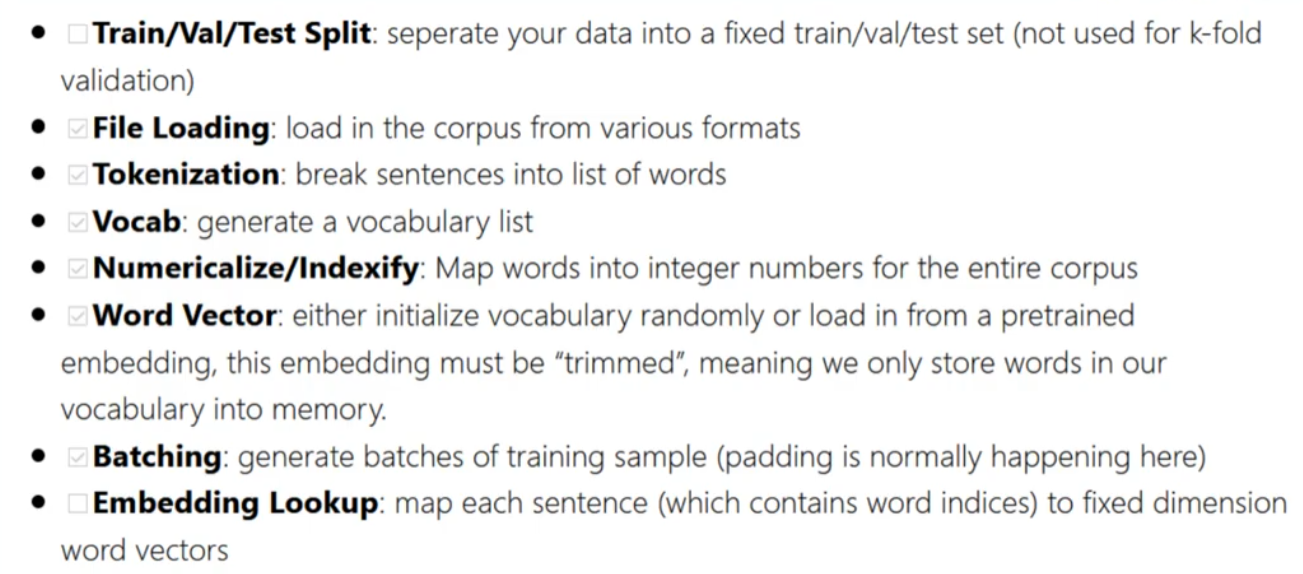

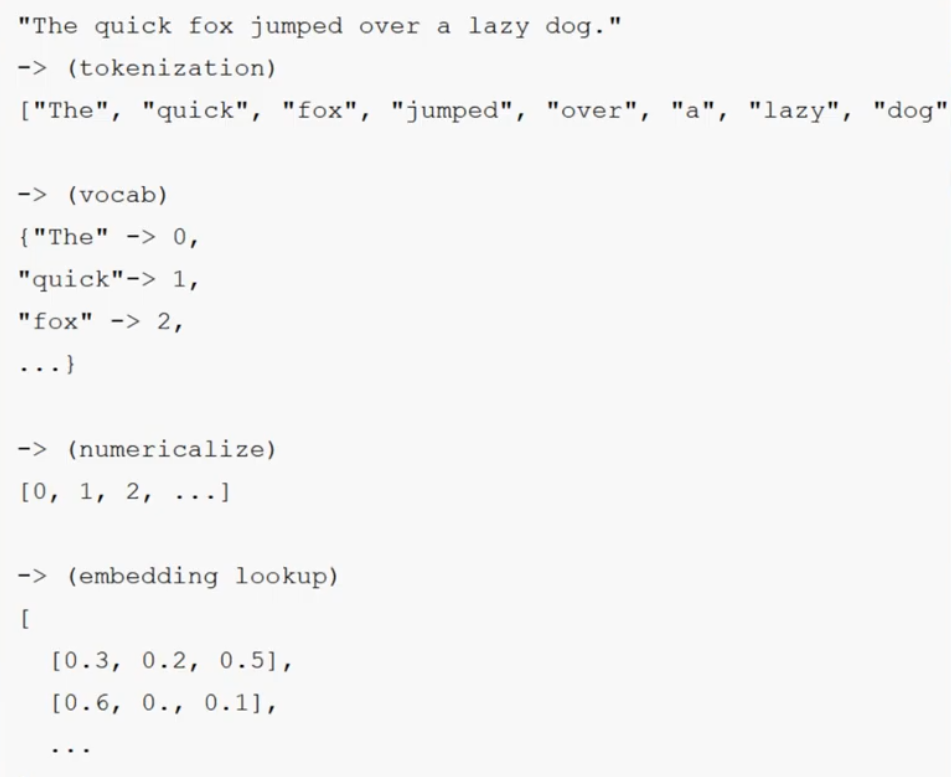

In [ ]:
#STEPS

#1. SPecify how preprocessing should be done -> Fields

#2. Use dataset tro load data -> TabularDataset(JSON/CSV/TSV Files)

# 3. Construct an iterator to do batching & padding -> BucketIterator

In [31]:
from torchtext.data import Field, TabularDataset, BucketIterator

In [37]:
import pandas as pd
pd.read_csv('dataset/text/test.csv')

,name,quote,score
0,Jocko,You must own everything in your world. There i...,1
1,Bruce Lee,"Do not pray for an easy life, pray for the str...",1
2,Potato guy,"Stand tall, and rice like a potato!",0


In [40]:
tokenize = lambda x: x.split()

#STEP: 1
quote = Field(sequential = True,
             use_vocab = True,
             tokenize = tokenize,
             lower = True)
 
score = Field(sequential = False,
             use_vocab = False)

fields = {'quote':('q', quote),
          'score':('s', score)} #specify which columns to use in dataset

#STEP: 2
train_data, test_data = TabularDataset.splits( path = 'dataset/text/',
                                               train = 'train.json', 
                                               test = 'test.json',
                                              #validation = 'validation.json'
                                               format = 'json', 
                                               fields = fields)

In [46]:
print( train_data[0].__dict__)

{'q': ['you', 'must', 'own', 'everything', 'in', 'your', 'world.', 'there', 'is', 'no', 'one', 'else', 'to', 'blame.'], 's': 1}


In [47]:
#Building a Vocabulary
quote.build_vocab(train_data,
                 max_size = 10000, #max size of vocab
                 min_freq = 1)     #include words that have a min. freuquency occurence

In [48]:
train_iterator, test_iterator = BucketIterator.splits( (train_data, test_data), 
                                                       batch_size = 2,
                                                      device = 'cuda')

In [53]:
for batch in train_iterator:
    print(batch.q)  #

tensor([[27],
        [29],
        [ 7],
        [26],
        [18],
        [ 2],
        [25]], device='cuda:0')
tensor([[33, 10],
        [19, 21],
        [24,  4],
        [14,  3],
        [15,  6],
        [34, 11],
        [32, 17],
        [31,  4],
        [16,  3],
        [20, 30],
        [22, 28],
        [12,  5],
        [ 5, 13],
        [ 8,  2],
        [ 1,  9],
        [ 1, 23]], device='cuda:0')


In [54]:
for batch in train_iterator:
    print(batch.s)  #scores column in dataset

tensor([1], device='cuda:0')
tensor([0, 1], device='cuda:0')
